<a href="https://colab.research.google.com/github/eunjipark123/olist_sellerside_analysis/blob/main/Olist_seller_sales_analysis_ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. 준비
## 1. 분석에 필요한 라이브러리와 파일 불러오기

In [1]:
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# 마케팅 퍼널 분석에 필요한 자료 리드

# 단계 별 데이터
mql = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_marketing_qualified_leads_dataset.csv") # mql 단계
cd = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_closed_deals_dataset.csv") # cd 단계
order_items = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_order_items_dataset.csv") # 주문-판매 단계 (아이템)
orders = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_orders_dataset.csv") # 주문-판매 단계 (주문 시각)


# 현재 불필요하다고 판단되는 데이터
#sellers = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_sellers_dataset.csv")
#customers = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_customers_dataset.csv")
#location = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_geolocation_dataset.csv")
# order_payments = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_order_payments_dataset.csv")
# categories = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/product_category_name_translation.csv")
# products = pd.read_csv("/content/drive/MyDrive/olist/01_dataset/olist_products_dataset.csv") # 상품 정보 

## (참고) 시각화 설정

In [3]:
# figsize 
sns.set(rc = {'figure.figsize' : (15, 10)})

In [4]:
# sns theme 설정
sns.set_theme(style="whitegrid")
sns.color_palette("Blues", 9)

[(0.8917339484813533, 0.9351018838908112, 0.9753940792003075),
 (0.8141176470588235, 0.883921568627451, 0.9498039215686275),
 (0.7161860822760477, 0.8332026143790849, 0.916155324875048),
 (0.5796078431372549, 0.7701960784313725, 0.8737254901960784),
 (0.41708573625528644, 0.6806305267204922, 0.8382314494425221),
 (0.2909803921568628, 0.5945098039215686, 0.7890196078431373),
 (0.1791464821222607, 0.49287197231833907, 0.7354248366013072),
 (0.09019607843137256, 0.39294117647058824, 0.6705882352941177),
 (0.03137254901960784, 0.2897347174163783, 0.570319108035371)]

In [6]:
# 폰트1 
!sudo apt-get install -y fonts-nanum # font nanum 을 컴퓨터에 다운 받는다
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,230 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

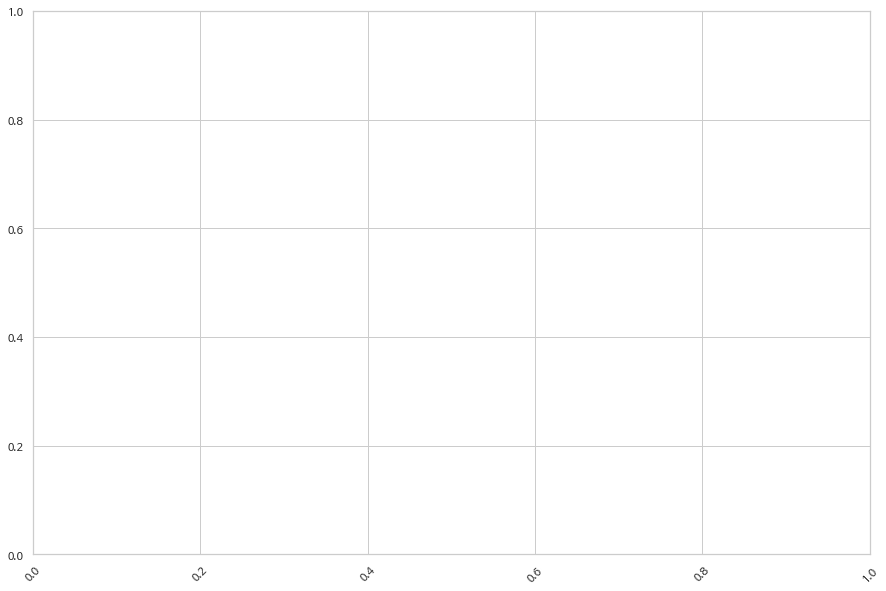

In [5]:
# 폰트2
plt.rc('font', family='NanumBarunGothic') # 폰트를 설정한다
plt.xticks(rotation=45) # 그래프 X 라벨의 글씨를 회전한다.

## 2. 테이블 확인 
- EDA를 통해 테이블 정보를 확인해본다. 

### 1) mql 테이블

In [6]:
# 총 4개의 컬럼과 8천 개의 자료로 구성됨 
# origin에 60개의 결측치 있음
# first_contact_date는 데이터 타입이 object로 데이터 타입 변경 필요

mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mql_id              8000 non-null   object
 1   first_contact_date  8000 non-null   object
 2   landing_page_id     8000 non-null   object
 3   origin              7940 non-null   object
dtypes: object(4)
memory usage: 250.1+ KB


In [7]:
# 데이터 타입 변경 (first_contact_date)
mql['first_contact_date'] = pd.to_datetime(mql['first_contact_date'])

In [8]:
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              7940 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


In [9]:
# first_contact_date 추이 
# 2018년 1월 이후 first_contact까지 간 leads 수가 급증하는 것을 알 수 있다. 
fc_date_trends = pd.DataFrame(mql.groupby([mql.first_contact_date.dt.year, mql.first_contact_date.dt.month])['mql_id'].count())
fc_date_trends.reset_index(level = 0, inplace = True)
fc_date_trends = fc_date_trends.rename(columns = {'first_contact_date' : 'fc_year', 'mql_id' : 'leads_cnt'})
fc_date_trends.reset_index(inplace = True)
fc_date_trends = fc_date_trends.rename(columns = {'first_contact_date' : 'fc_month'})
fc_date_trends = fc_date_trends[['fc_year', 'fc_month', 'leads_cnt']]
fc_date_trends

,fc_year,fc_month,leads_cnt
0,2017,6,4
1,2017,7,239
2,2017,8,386
3,2017,9,312
4,2017,10,416
5,2017,11,445
6,2017,12,200
7,2018,1,1141
8,2018,2,1028
9,2018,3,1174


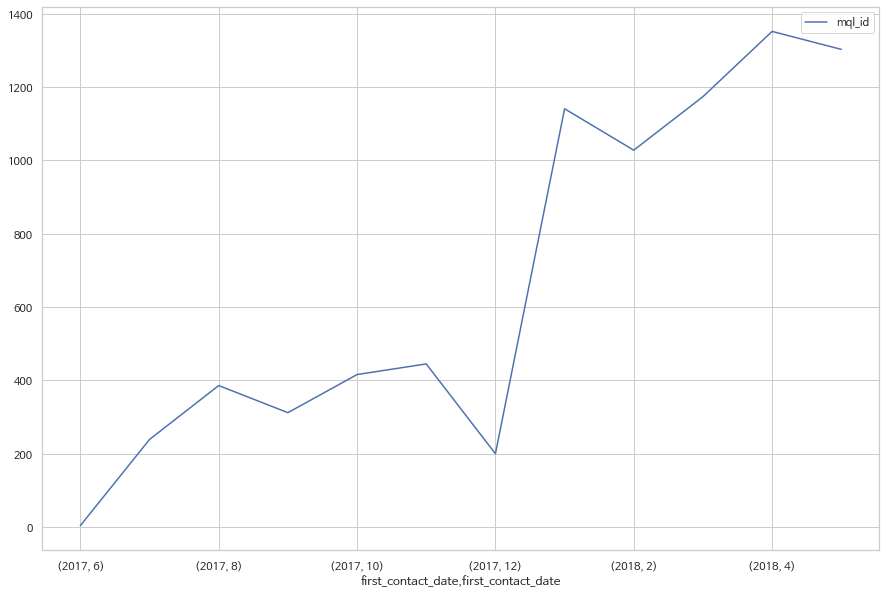

In [10]:
pd.DataFrame(mql.groupby([mql.first_contact_date.dt.year, mql.first_contact_date.dt.month])['mql_id'].count()).plot()

In [11]:
# landing_page의 고유한 값이 약 495개 있음 
# 이중 top5는 최소 394명의 유저가 방문한 랜딩 페이지 유형을 의미함
pd.Series(mql['landing_page_id'].value_counts()).head(5)

b76ef37428e6799c421989521c0e5077    912
22c29808c4f815213303f8933030604c    883
58326e62183c14b0c03085c33b9fdc44    495
88740e65d5d6b056e0cda098e1ea6313    445
ce1a65abd0973638f1c887a6efcfa82d    394
Name: landing_page_id, dtype: int64

In [12]:
# mql 채널 정보는 다음과 같음 
# paid_search : 유료 검색 광고
# social : sns
# direct_traffic : 직접 접속 
# display : 온라인 배너 광고 
# other_publicities : 홍보

# unknown은 채널 경로를 알 수 없으나, 개체 수가 많은 만큼 무시할 수 없음 --> 12/16 결론 : unknown과 other, null값을 unknown으로 통합  --> 12/20 : other_publicities도 통합 --> 12/20 : 12/16으로
mql['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1099
direct_traffic        499
email                 493
referral              284
other                 150
display               118
other_publicities      65
Name: origin, dtype: int64

In [13]:
mql.loc[mql['origin'] == 'other','origin'] = 'unknown'
# mql.loc[mql['origin'] == 'other_publicities','origin'] = 'unknown' # 12/20 추가
mql.loc[mql['origin'].isna(),'origin'] = 'unknown'

In [14]:
# origin에서 other, other_publicties, null값이 모두 unknown으로 편입된 것을 볼 수 있다. 
mql['origin'].value_counts()

organic_search       2296
paid_search          1586
social               1350
unknown              1309
direct_traffic        499
email                 493
referral              284
display               118
other_publicities      65
Name: origin, dtype: int64

In [15]:
mql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mql_id              8000 non-null   object        
 1   first_contact_date  8000 non-null   datetime64[ns]
 2   landing_page_id     8000 non-null   object        
 3   origin              8000 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 250.1+ KB


### 2) cd(closed_deals) 테이블

In [18]:
# cd 테이블은 mql 테이블의 lead 중 olist의 seller로 전환된 (셀러)고객을 의미함
# 842명이 셀러로 전환되었으며, 계약을 성사시킨 sdr, sr 직원의 정보와 체결 날짜를 알 수 있다. 
# 계약 당시 셀러가 기입한 비즈니스 정보에 대해서 알 수 있음
# 이 중 has_company, has_gtin, avergage_stock, declared_product_catalog_size는 null값이 많아 분석으로 사용 불가
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842 entries, 0 to 841
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   seller_id                      842 non-null    object        
 2   sdr_id                         842 non-null    object        
 3   sr_id                          842 non-null    object        
 4   won_date                       842 non-null    datetime64[ns]
 5   business_segment               841 non-null    object        
 6   lead_type                      836 non-null    object        
 7   lead_behaviour_profile         665 non-null    object        
 8   has_company                    63 non-null     object        
 9   has_gtin                       64 non-null     object        
 10  average_stock                  66 non-null     object        
 11  business_type      

In [19]:
# won_date의 데이터타입을 '날짜'로 변경
cd['won_date'] = pd.to_datetime(cd['won_date'])

In [20]:
cd.groupby('lead_type')['mql_id'].count()

lead_type
industry           123
offline            104
online_beginner     57
online_big         126
online_medium      332
online_small        77
online_top          14
other                3
Name: mql_id, dtype: int64

In [21]:
# busines_segment
cd['business_segment'].unique()

array(['pet', 'car_accessories', 'home_appliances', 'food_drink',
       'health_beauty', 'computers', 'household_utilities',
       'construction_tools_house_garden', 'toys', 'sports_leisure',
       'stationery', 'food_supplement', 'home_decor', 'bed_bath_table',
       'watches', 'fashion_accessories', 'jewerly', 'party',
       'small_appliances', 'audio_video_electronics', 'other',
       'bags_backpacks', 'home_office_furniture', 'music_instruments',
       'books', 'baby', 'air_conditioning', 'phone_mobile', nan,
       'handcrafted', 'perfume', 'gifts', 'religious', 'games_consoles'],
      dtype=object)

In [22]:
cd.loc[cd['business_segment'] == 'nan'] = 'other'

In [23]:
# business_type에 어떤 값들이 있는지 확인
# nan값은 other로 편입시키기
cd['business_type'].unique()

array(['reseller', 'manufacturer', 'other', nan], dtype=object)

In [24]:
cd.loc[cd['business_type'] == 'nan', 'business_type'] = 'other'
cd.loc[cd['business_type'].isna(), 'business_type'] = 'other'

In [25]:
# nan, null값이 other로 변경되었음
cd['business_type'].unique()

array(['reseller', 'manufacturer', 'other'], dtype=object)

### 3) orders, order_items

In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [27]:
# 주로 사용할 opt를 date 형식으로 변경
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

## 3. 필요한 테이블 준비하기

### 1) mf 테이블 : mql & olist (by = mql_id)
- 첫 연락을 받은 Olist 리드(잠재 셀러) 중 계약 체결을 통해 셀러로 전환된 셀러 정보를 확인할 수 있음
- 해석1. mql_id는 있지만, seller_id는 없는 경우 셀러로 전환되지 않은 것 
- 해석2. mql_id도 있고 seller_id도 있다면 셀러로 전환된 것


In [28]:
# mql 테이블과 closed_deals 테이블이 1:1 관계이므로 중복 이슈 없음
mf = mql.merge(cd, how = 'left', on = 'mql_id')
mf.head(2)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         8000 non-null   object        
 1   first_contact_date             8000 non-null   datetime64[ns]
 2   landing_page_id                8000 non-null   object        
 3   origin                         8000 non-null   object        
 4   seller_id                      842 non-null    object        
 5   sdr_id                         842 non-null    object        
 6   sr_id                          842 non-null    object        
 7   won_date                       842 non-null    object        
 8   business_segment               841 non-null    object        
 9   lead_type                      836 non-null    object        
 10  lead_behaviour_profile         665 non-null    object        
 11  has_company      

In [30]:
# datetime 형식 변경 (won_date)
mf['won_date'] = pd.to_datetime(mf['won_date'])
mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         8000 non-null   object        
 1   first_contact_date             8000 non-null   datetime64[ns]
 2   landing_page_id                8000 non-null   object        
 3   origin                         8000 non-null   object        
 4   seller_id                      842 non-null    object        
 5   sdr_id                         842 non-null    object        
 6   sr_id                          842 non-null    object        
 7   won_date                       842 non-null    datetime64[ns]
 8   business_segment               841 non-null    object        
 9   lead_type                      836 non-null    object        
 10  lead_behaviour_profile         665 non-null    object        
 11  has_company      

### 2) seller_first_order 테이블 : orders, order_items 테이블 (by = order_id)
- 주문 이력이 있는 셀러 중 첫 주문을 받은 날짜 정보를 확인할 수 있다. 
- order_with_items 테이블 : order_items 테이블과 합치기 (seller_ 별 order 정보를 확인하기 위해)
- seller_first_order 테이블 : orders 테이블에서 첫 주문 데이터만 남겨놓기 (first_order 계약 체결 후 처음 주문까지의 퍼널이 필요하므로, 중복 데이터 방지)


In [31]:
# order_with_items 테이블 만들기 (order_id를 기준으로 이너 조인한다.)
order_with_items = orders.merge(order_items, how = 'inner', on='order_id')
order_with_items.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76


In [32]:
# seller_id 별로 최초의 주문만 남겨두기 (opt가 가장 빠른 시점인 주문건만 남겨둔다)
seller_first_order = pd.DataFrame(order_with_items.groupby('seller_id')['order_purchase_timestamp'].min())
seller_first_order.head(3)

,order_purchase_timestamp
seller_id,
0015a82c2db000af6aaaf3ae2ecb0532,2017-09-26 22:17:05
001cca7ae9ae17fb1caed9dfb1094831,2017-02-04 19:06:04
001e6ad469a905060d959994f1b41e4f,2018-08-07 22:50:37


In [33]:
seller_first_order.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3095 entries, 0015a82c2db000af6aaaf3ae2ecb0532 to ffff564a4f9085cd26170f4732393726
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  3095 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 48.4+ KB


### 3) mf_orders 테이블 : mf테이블, seller_first_order 테이블 (최종)
- mql 리드 중 셀러로 전환된 셀러 수, 셀러 중 판매까지 완료된 셀러 수를 알 수 있음 (전환율 측정)
- first_contact_date, won_date, order_purchase_timestamp까지의 리드타임을 파악할 수 있음

In [34]:
mf_orders = mf.merge(seller_first_order, how = 'left', on = 'seller_id')
mf_orders.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_purchase_timestamp
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-06-20 21:40:18


In [35]:
mf_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         8000 non-null   object        
 1   first_contact_date             8000 non-null   datetime64[ns]
 2   landing_page_id                8000 non-null   object        
 3   origin                         8000 non-null   object        
 4   seller_id                      842 non-null    object        
 5   sdr_id                         842 non-null    object        
 6   sr_id                          842 non-null    object        
 7   won_date                       842 non-null    datetime64[ns]
 8   business_segment               841 non-null    object        
 9   lead_type                      836 non-null    object        
 10  lead_behaviour_profile         665 non-null    object        
 11  has_company      

In [36]:
mf_orders['won_date'] = pd.to_datetime(mf_orders['won_date'])
mf_orders['order_purchase_timestamp'] = pd.to_datetime(mf_orders['order_purchase_timestamp'])
mf_orders['declared_monthly_revenue'] = mf_orders['declared_monthly_revenue'].astype(str).astype(float)
mf_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         8000 non-null   object        
 1   first_contact_date             8000 non-null   datetime64[ns]
 2   landing_page_id                8000 non-null   object        
 3   origin                         8000 non-null   object        
 4   seller_id                      842 non-null    object        
 5   sdr_id                         842 non-null    object        
 6   sr_id                          842 non-null    object        
 7   won_date                       842 non-null    datetime64[ns]
 8   business_segment               841 non-null    object        
 9   lead_type                      836 non-null    object        
 10  lead_behaviour_profile         665 non-null    object        
 11  has_company      

In [37]:
mf_items = mf.merge(order_items, how = 'left', on = 'seller_id')
mf_items['won_date'] = pd.to_datetime(mf_items['won_date'])
mf_items['declared_monthly_revenue'] = mf_items['declared_monthly_revenue'].astype(str).astype(float)
mf_items.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12664 entries, 0 to 12663
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         12664 non-null  object        
 1   first_contact_date             12664 non-null  datetime64[ns]
 2   landing_page_id                12664 non-null  object        
 3   origin                         12664 non-null  object        
 4   seller_id                      5506 non-null   object        
 5   sdr_id                         5506 non-null   object        
 6   sr_id                          5506 non-null   object        
 7   won_date                       5506 non-null   datetime64[ns]
 8   business_segment               5505 non-null   object        
 9   lead_type                      5455 non-null   object        
 10  lead_behaviour_profile         3679 non-null   object        
 11  has_company    

# II. 분석

## 1. 전체 전환율 측정 
- MQL -> cd_conversion rate : closed_deal 단계의 셀러 수 / mql 단계의 리드 수 * 100(%), 셀러 수 측정 기준(seller_id), 리드 수 측정 기준(mql_id)
- Seller -> selling_conversion_rate : 주문 내역이 있는 셀러 수 / closed_deals 단계의 셀러 수 * 100(%), 주문 내역 있는 셀러 수 측정 기준(주문 내역 조건을 만족하는 셀러 seller_id)

In [38]:
# 각 단계 별 사람 수
mql_general = mf_orders['mql_id'].count() # 리드 수
cd_general = mf_orders['seller_id'].count() # 셀러로 전환된 리드 수
order_general = mf_orders.loc[mf_orders['order_purchase_timestamp'].notna(), 'seller_id'].count() # 판매 기록이 있는 셀러 수

print(mql_general, cd_general, order_general)

8000 842 380


In [39]:
# 전환율 측정
general_contract_conversion_rate = cd_general / mql_general * 100
general_order_conversion_rate = order_general / cd_general * 100
print(general_contract_conversion_rate, general_order_conversion_rate)

10.525 45.13064133016627


In [40]:
# 전체 전환율을 표로 나타내면 다음과 같다
conversion_total = {'leads': mql_general, 'contracted_sellers': cd_general, 'ordered_sellers' : order_general, 'contract_cvr' : general_contract_conversion_rate, 'order_cvr' : general_order_conversion_rate}
pd.DataFrame(conversion_total, index = [0])

,leads,contracted_sellers,ordered_sellers,contract_cvr,order_cvr
0,8000,842,380,10.525,45.130641


- 전환율을 퍼널로 시각화하기

In [41]:
# 퍼널 단계를 리스트로 표현
general_funnels = [mql_general, cd_general, order_general]

In [42]:
# plotly 라이브러리로 퍼널 표현하기
data = dict(
    number = general_funnels,
    stage = ['leads','seller_contracted','seller_ordered'])

fig = px.funnel(data, x='number', y='stage', title = '셀러 전환 및 주문 전환 퍼널')
fig.show()

##2. 코호트 별 전환율 측정
- 세부 코호트 별로 전환율을 측정하고 비교해본다. 

### 1) 유입 경로(origin) 별 전환율


#### 1️⃣ 전체 전환율 (기간 무관)

In [43]:
# 유입 경로 별 판매 셀러 수를 측정하기 위해 판매 이력이 있는 셀러들만 출력
ordered_sellers_list = pd.DataFrame(mf_orders.loc[mf_orders['order_purchase_timestamp'].notna(), 'seller_id'])

# mf_orders 테이블과 연동하여 판매 이력이 있는 셀러들로만 테이블 구성
mf_orders_ordered_sellers = mf_orders.merge(ordered_sellers_list, how = 'inner', on = 'seller_id')

In [44]:
# 유입 경로 별 리드, 셀러, 판매 셀러 수 측정

# 리드 수
lead_per_origin = pd.DataFrame(mf.groupby('origin')['mql_id'].count().sort_values(ascending = False)) 
lead_per_origin.rename(columns = {'mql_id' : 'leads'}, inplace = True)

# 판매자 전환 수
seller_per_origin = pd.DataFrame(mf.groupby('origin')['seller_id'].count().sort_values(ascending = False)) 
seller_per_origin.rename(columns = {'seller_id' : 'sellers_contracted'}, inplace = True)

# 주문 전환 수
seller_ordered_per_origin = pd.DataFrame(mf_orders_ordered_sellers.groupby('origin')['seller_id'].count().sort_values(ascending = False)) 
seller_ordered_per_origin.rename(columns = {'seller_id' : 'sellers_ordered'}, inplace = True)

In [45]:
# 유입 경로 별 셀러 전환 수, 전환율 측정

a = lead_per_origin.merge(seller_per_origin, how = 'left', on = 'origin')
conversion_per_origin = a.merge(seller_ordered_per_origin, how = 'left', on = 'origin')
conversion_per_origin['sellers_ordered'].fillna(0, inplace = True)
conversion_per_origin['seller_conversion_rate(%)'] = conversion_per_origin['sellers_contracted'] / conversion_per_origin['leads'] * 100
conversion_per_origin['order_conversion_rate(%)'] = conversion_per_origin['sellers_ordered'] / conversion_per_origin['sellers_contracted'] * 100
conversion_per_origin

,leads,sellers_contracted,sellers_ordered,seller_conversion_rate(%),order_conversion_rate(%)
origin,,,,,
organic_search,2296,271,113.0,11.803136,41.697417
paid_search,1586,195,101.0,12.295082,51.794872
social,1350,75,31.0,5.555556,41.333333
unknown,1309,197,87.0,15.049656,44.162437
direct_traffic,499,56,31.0,11.222445,55.357143
email,493,15,6.0,3.042596,40.000000
referral,284,24,9.0,8.450704,37.500000
display,118,6,2.0,5.084746,33.333333
other_publicities,65,3,0.0,4.615385,0.000000


In [46]:
# 시각화

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = conversion_per_origin.index
column0 = conversion_per_origin['seller_conversion_rate(%)']
column1 = conversion_per_origin['order_conversion_rate(%)']
title0 = 'seller_conversion_rate(%)'
title1 = 'order_conversion_rate(%)'

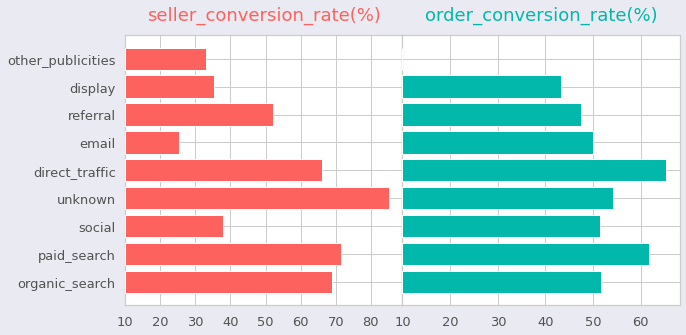

In [47]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
# ax.set_xlim(right=15)  # adjust xlim to fit labels
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# axes[0].invert_xaxis() 
# plt.gca().invert_yaxis()

axes[0].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
axes[1].set_xticklabels([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)


plt.show()

#### 2️⃣ first_contact_date에 따른 유입 경로 별 전환율 추이

In [48]:
# first_contact_date를 연-월로 표기 -> first_contact_month 컬럼 추가
mf_monthly = mf
mf_monthly['first_contact_month'] = pd.to_datetime(mf_monthly['first_contact_date']).dt.to_period('M')
mf_orders_monthly = mf_orders_ordered_sellers
mf_orders_monthly['first_contact_month'] = pd.to_datetime(mf_orders_monthly['first_contact_date']).dt.to_period('M')

In [49]:
# first_contact_month, origin 별 리드, 셀러, 판매 셀러 수 측정
# 리드 수
lead_per_origin_first = pd.DataFrame(mf_monthly.groupby(['first_contact_month','origin'])['mql_id'].count().sort_values(ascending = False)) 
lead_per_origin_first.rename(columns = {'mql_id' : 'leads'}, inplace = True)

# 판매자 전환 수
seller_per_origin_first = pd.DataFrame(mf_monthly.groupby(['first_contact_month','origin'])['seller_id'].count().sort_values(ascending = False)) 
seller_per_origin_first.rename(columns = {'seller_id' : 'sellers_contracted'}, inplace = True)

# 주문 전환 수
seller_ordered_per_origin_first = pd.DataFrame(mf_orders_monthly.groupby(['first_contact_month','origin'])['seller_id'].count().sort_values(ascending = False)) 
seller_ordered_per_origin_first.rename(columns = {'seller_id' : 'sellers_ordered'}, inplace = True)


In [50]:
lead_per_origin_first.reset_index(inplace = True)
seller_per_origin_first.reset_index(inplace = True)

In [51]:
mo = lead_per_origin_first.merge(seller_per_origin_first, how = 'left', on = ['first_contact_month','origin'])
conversion_per_origin_first = mo.merge(seller_ordered_per_origin_first, how = 'left', on = ['first_contact_month','origin'])
conversion_per_origin_first['sellers_ordered'].fillna(0, inplace = True)
conversion_per_origin_first['seller_conversion_rate(%)'] = conversion_per_origin_first['sellers_contracted'] / conversion_per_origin_first['leads'] * 100
conversion_per_origin_first['order_conversion_rate(%)'] = conversion_per_origin_first['sellers_ordered'] / conversion_per_origin_first['sellers_contracted'] * 100
conversion_per_origin_first.sort_values(by = (['first_contact_month', 'seller_conversion_rate(%)']), ascending = (True, False), inplace = True)
conversion_per_origin_first

,first_contact_month,origin,leads,sellers_contracted,sellers_ordered,seller_conversion_rate(%),order_conversion_rate(%)
97,2017-06,unknown,2,0,0.0,0.000000,NaN
99,2017-06,email,1,0,0.0,0.000000,NaN
101,2017-06,display,1,0,0.0,0.000000,NaN
47,2017-07,unknown,52,2,1.0,3.846154,50.000000
42,2017-07,paid_search,56,0,0.0,0.000000,NaN
...,...,...,...,...,...,...,...
78,2018-05,display,11,1,0.0,9.090909,0.000000
30,2018-05,direct_traffic,78,7,4.0,8.974359,57.142857
7,2018-05,social,269,11,4.0,4.089219,36.363636
25,2018-05,email,94,2,0.0,2.127660,0.000000


In [52]:
a = conversion_per_origin_first.reset_index()
a.loc[a['origin'] == 'direct_traffic']

,index,first_contact_month,origin,leads,sellers_contracted,sellers_ordered,seller_conversion_rate(%),order_conversion_rate(%)
8,71,2017-07,direct_traffic,16,0,0.0,0.000000,NaN
17,65,2017-08,direct_traffic,22,0,0.0,0.000000,NaN
26,64,2017-09,direct_traffic,22,0,0.0,0.000000,NaN
35,63,2017-10,direct_traffic,23,0,0.0,0.000000,NaN
44,60,2017-11,direct_traffic,26,0,0.0,0.000000,NaN
48,81,2017-12,direct_traffic,10,2,1.0,20.000000,50.000000
58,26,2018-01,direct_traffic,82,18,8.0,21.951220,44.444444
68,37,2018-02,direct_traffic,65,9,4.0,13.846154,44.444444
80,27,2018-03,direct_traffic,80,7,5.0,8.750000,71.428571
86,31,2018-04,direct_traffic,75,13,9.0,17.333333,69.230769


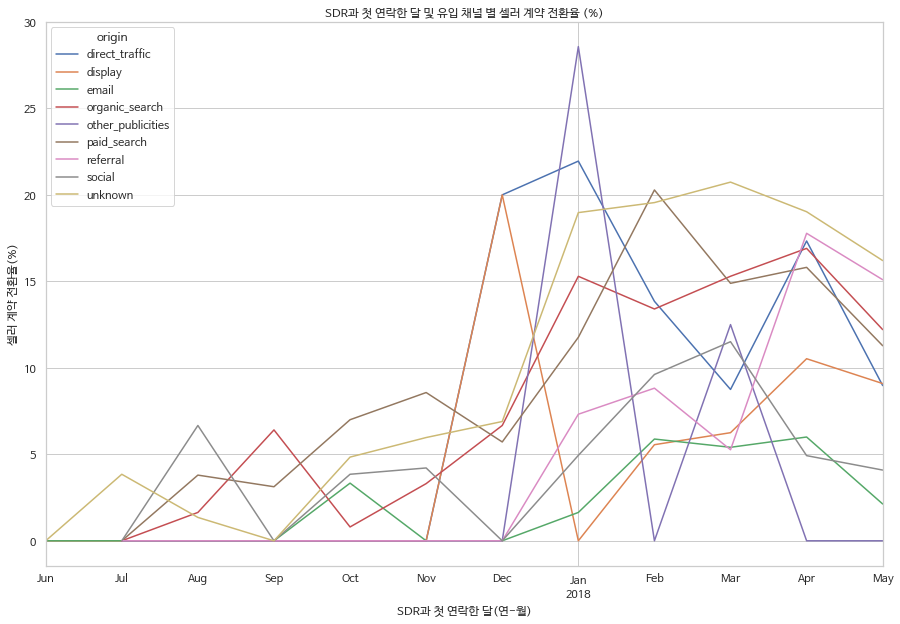

In [53]:
# seller_전환율 
# pivot table로 전환 
seller_conversion_per_origin_date_pivot = pd.pivot_table(conversion_per_origin_first, values='seller_conversion_rate(%)', columns=['origin'],
                    index=['first_contact_month'])
seller_conversion_per_origin_date_pivot.plot(figsize = (15, 10), title = 'SDR과 첫 연락한 달 및 유입 채널 별 셀러 계약 전환율 (%)', xlabel = "SDR과 첫 연락한 달(연-월)", ylabel = '셀러 계약 전환율(%)')

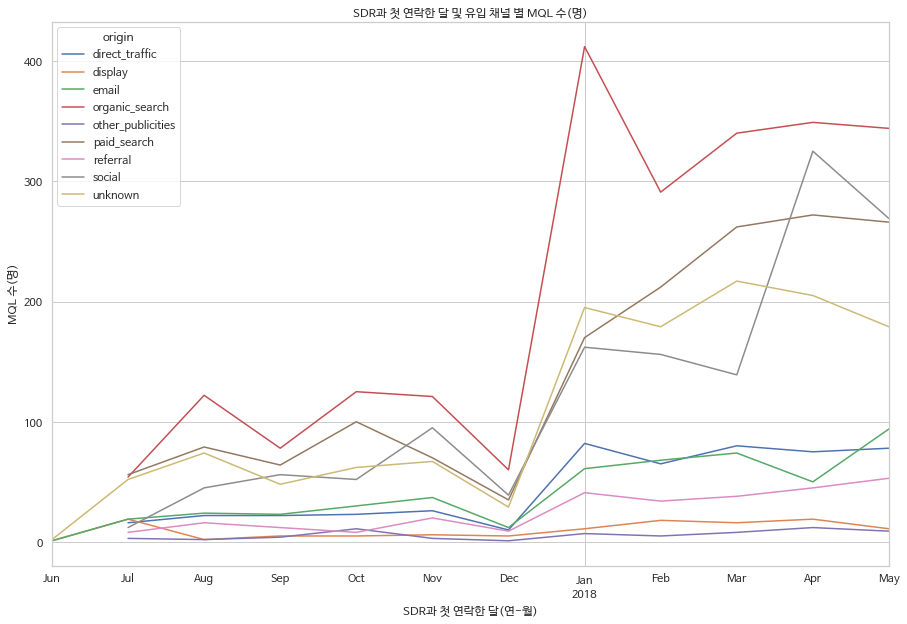

In [54]:
# 노출된 리드 
# pivot table로 전환 
seller_conversion_per_origin_date_pivot = pd.pivot_table(conversion_per_origin_first, values='leads', columns=['origin'],
                    index=['first_contact_month'])
seller_conversion_per_origin_date_pivot.plot(figsize = (15, 10), title = 'SDR과 첫 연락한 달 및 유입 채널 별 MQL 수(명)', xlabel = "SDR과 첫 연락한 달(연-월)", ylabel = 'MQL 수(명)')

### 2) landing_page_id 별 전환율 

#### 1️⃣ 전체 기간

##### 시도1 : 모든 landing_page_id 별 전환율 측정

In [55]:
# 판매 이력이 있는 셀러 테이블 : mf_orders_ordered_sellers

In [56]:
# landing_page_id 별 리드, 셀러, 판매 셀러 수 측정

# 리드 수
lead_per_landing = pd.DataFrame(mf.groupby('landing_page_id')['mql_id'].count().sort_values(ascending = False)) 
lead_per_landing.rename(columns = {'mql_id' : 'leads'}, inplace = True)

# 판매자 전환 수
seller_per_landing = pd.DataFrame(mf.groupby('landing_page_id')['seller_id'].count().sort_values(ascending = False)) 
seller_per_landing.rename(columns = {'seller_id' : 'sellers_contracted'}, inplace = True)

# 주문 전환 수
seller_ordered_per_landing = pd.DataFrame(mf_orders_ordered_sellers.groupby('landing_page_id')['seller_id'].count().sort_values(ascending = False)) 
seller_ordered_per_landing.rename(columns = {'seller_id' : 'sellers_ordered'}, inplace = True)

In [57]:
# 유입 경로 별 셀러 전환 수, 전환율 측정

c = lead_per_landing.merge(seller_per_landing, how = 'left', on = 'landing_page_id')
conversion_per_landing = c.merge(seller_ordered_per_landing, how = 'left', on = 'landing_page_id')
conversion_per_landing['sellers_ordered'].fillna(0, inplace = True)
conversion_per_landing['seller_conversion_rate(%)'] = conversion_per_landing['sellers_contracted'] / conversion_per_landing['leads'] * 100
conversion_per_landing['order_conversion_rate(%)'] = conversion_per_landing['sellers_ordered'] / conversion_per_landing['sellers_contracted'] * 100
conversion_per_landing

,leads,sellers_contracted,sellers_ordered,seller_conversion_rate(%),order_conversion_rate(%)
landing_page_id,,,,,
b76ef37428e6799c421989521c0e5077,912,171,81.0,18.750000,47.368421
22c29808c4f815213303f8933030604c,883,174,82.0,19.705549,47.126437
58326e62183c14b0c03085c33b9fdc44,495,27,11.0,5.454545,40.740741
88740e65d5d6b056e0cda098e1ea6313,445,31,14.0,6.966292,45.161290
ce1a65abd0973638f1c887a6efcfa82d,394,59,29.0,14.974619,49.152542
...,...,...,...,...,...
2204d1cf0ec6a0cf20f7342e99d88ec8,1,0,0.0,0.000000,NaN
8345a83d419160e69c0501b494dadfa6,1,0,0.0,0.000000,NaN
83355a82a9cee26f3ba2b186ddb0bbbe,1,1,0.0,100.000000,0.000000


##### 시도2. 의미있는 랜딩 페이지란? (설명용)

In [150]:
# 페이지 별 집계
landing_value = pd.DataFrame(mf['landing_page_id'].value_counts())
landing_value.rename(columns = {'landing_page_id' : 'leads'}, inplace = True)
landing_value.sort_values(by = 'leads', ascending = False, inplace = True)
landing_value['leads_cumsum'] =  landing_value['leads'].cumsum()
landing_value['leads_cum_pct'] = landing_value['leads_cumsum'] / landing_value['leads_cumsum'].max()
landing_value.loc[landing_value['leads_cum_pct']<0.75]

,leads,leads_cumsum,leads_cum_pct
b76ef37428e6799c421989521c0e5077,912,912,0.114000
22c29808c4f815213303f8933030604c,883,1795,0.224375
58326e62183c14b0c03085c33b9fdc44,495,2290,0.286250
88740e65d5d6b056e0cda098e1ea6313,445,2735,0.341875
ce1a65abd0973638f1c887a6efcfa82d,394,3129,0.391125
40dec9f3d5259a3d2dbcdab2114fae47,330,3459,0.432375
f017be4dbf86243af5c1ebed0cff36a2,310,3769,0.471125
e492ee5eaf1697716985cc6f33f9cd9b,291,4060,0.507500
a7982125ff7aa3b2054c6e44f9d28522,156,4216,0.527000
73f31a40697cc90a86c1273563ac230e,115,4331,0.541375


In [61]:
seller_converted = mf.loc[mf['seller_id'].notna()]
seller_not_converted = mf.loc[mf['seller_id'].isna()]

##### 시도2. 30명 이상 본 랜딩페이지로 한정
- 현실적으로 의미 있는 수인 30명을 기준으로 랜딩 페이지 자름

In [62]:
# 페이지 별 집계
mf_landing_cut = pd.DataFrame(mf.groupby('landing_page_id')['mql_id'].count())
mf_landing_cut.rename(columns = {'mql_id':'leads'}, inplace = True)

# mf 테이블과 결합
mf_landing = mf.merge(mf_landing_cut, how = 'inner', on = 'landing_page_id')
mf_landing_final = mf_landing.loc[mf_landing['leads'] >= 30]

# mf_orders_ordered_sellers 테이블과 결합
mf_orders_landing = mf_orders_ordered_sellers.merge(mf_landing_cut, how = 'inner', on = 'landing_page_id')
mf_orders_landing_final = mf_orders_landing.loc[mf_landing['leads'] >= 30]



# landing_page_id 별 리드, 셀러, 판매 셀러 수 측정
# 리드 수
lead_per_landing_30 = pd.DataFrame(mf_landing_final.groupby('landing_page_id')['mql_id'].count().sort_values(ascending = False)) 
lead_per_landing_30.rename(columns = {'mql_id' : 'leads'}, inplace = True)

# 판매자 전환 수
seller_per_landing_30 = pd.DataFrame(mf_landing_final.groupby('landing_page_id')['seller_id'].count().sort_values(ascending = False)) 
seller_per_landing_30.rename(columns = {'seller_id' : 'sellers_contracted'}, inplace = True)

# 주문 전환 수
seller_ordered_per_landing_30 = pd.DataFrame(mf_orders_landing_final.groupby('landing_page_id')['seller_id'].count().sort_values(ascending = False)) 
seller_ordered_per_landing_30.rename(columns = {'seller_id' : 'sellers_ordered'}, inplace = True)

In [63]:
d = lead_per_landing_30.merge(seller_per_landing_30, how = 'left', on = 'landing_page_id')
conversion_per_landing_30 = d.merge(seller_ordered_per_landing_30, how = 'left', on = 'landing_page_id')
conversion_per_landing_30['sellers_ordered'].fillna(0, inplace = True)
conversion_per_landing_30['seller_conversion_rate(%)'] = conversion_per_landing_30['sellers_contracted'] / conversion_per_landing_30['leads'] * 100
conversion_per_landing_30['order_conversion_rate(%)'] = conversion_per_landing_30['sellers_ordered'] / conversion_per_landing_30['sellers_contracted'] * 100
conversion_per_landing_30.sample(2)

,leads,sellers_contracted,sellers_ordered,seller_conversion_rate(%),order_conversion_rate(%)
landing_page_id,,,,,
4e82dd1f6d00626bda0723eef0a269a6,30,1,1.0,3.333333,100.000000
1ceb590cd1e00c7ee95220971f82693d,71,9,4.0,12.676056,44.444444


In [64]:
conversion_per_landing_30.index

Index(['b76ef37428e6799c421989521c0e5077', '22c29808c4f815213303f8933030604c',
       '58326e62183c14b0c03085c33b9fdc44', '88740e65d5d6b056e0cda098e1ea6313',
       'ce1a65abd0973638f1c887a6efcfa82d', '40dec9f3d5259a3d2dbcdab2114fae47',
       'f017be4dbf86243af5c1ebed0cff36a2', 'e492ee5eaf1697716985cc6f33f9cd9b',
       'a7982125ff7aa3b2054c6e44f9d28522', '73f31a40697cc90a86c1273563ac230e',
       '241f79c7a8fe0270f4fb79fcbbcd17ad', '65d9f9d71e562365e8b44037c2888d98',
       '87732658ba41d8775e8577df347a64db', '1722481ac9e5371e5099dea226b5421d',
       '1ceb590cd1e00c7ee95220971f82693d', '7fa6214d82e911d070f51ef79381b956',
       'b6885f18d203a61176418c1fb3764815', '007f9098284a86ee80ddeb25d53e0af8',
       '330b9d44078a1ae5a221d655dcb77afa', '649b7b8b46b254497e92038d88f6ced8',
       '36120633c8737035fbabf079082f4ec1', '35c9b150ab36fe584c1f24fd458c453a',
       'f98c2bd96ac4a5d9476734e790c91384', 'b48ec5f3b04e9068441002a19df93c6c',
       'f80696b73d17fb34f5c4fde157f119d8', '30077c17

In [65]:
# 시각화

In [66]:
font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = conversion_per_landing_30.index
column0 = conversion_per_landing_30['seller_conversion_rate(%)']
column1 = conversion_per_landing_30['order_conversion_rate(%)']
title0 = 'seller_conversion_rate(%)'
title1 = 'order_conversion_rate(%)'

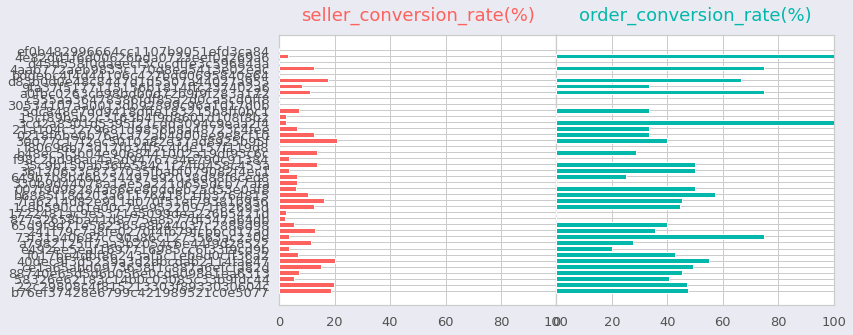

In [67]:
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# axes[0].invert_xaxis() 
# plt.gca().invert_yaxis()

axes[0].set_xbound(lower = 0, upper = 100)
axes[1].set_xbound(lower = 0, upper = 100)

for label in (axes[0].get_xticklabels() + axes[0].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)
for label in (axes[1].get_xticklabels() + axes[1].get_yticklabels()):
    label.set(fontsize=13, color=font_color, **hfont)

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)


# 실행 시 오래 걸림 .. 
plt.show()


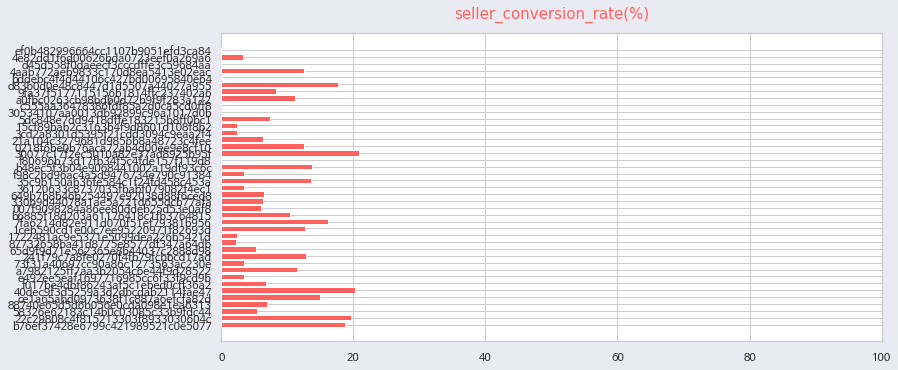

In [68]:
# 어떤 landing_page도 셀러로 전환되는 비율이 20.3%를 넘지 않는다. 
fig, ax = plt.subplots(figsize = (10,5), facecolor = facecolor)
fig.tight_layout()

bars = ax.barh(index, column0, align='center', color=color_red, zorder=10)
ax.set_title(title0, fontsize=15, pad=15, color=color_red, **hfont)
# ax.bar_labels(bars, label_type='center')

plt.xlim([0, 100])  # X, Y축의 범위: [xmin, xmax, ymin, ymax]
plt.show()


In [69]:
seller_cvr = conversion_per_landing_30.sort_values(by = 'seller_conversion_rate(%)', ascending = False)
order_cvr = conversion_per_landing_30.sort_values(by = 'order_conversion_rate(%)', ascending = False)

In [70]:
seller_cvr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 30077c17f2ec5010a82e37ad8925b95f to ef0b482996664cc1107b9051efd3ca84
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   leads                      41 non-null     int64  
 1   sellers_contracted         41 non-null     int64  
 2   sellers_ordered            41 non-null     float64
 3   seller_conversion_rate(%)  41 non-null     float64
 4   order_conversion_rate(%)   35 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.9+ KB


In [71]:
# 셀러 전환율이 높은 상위 5개의 랜딩 페이지
seller_cvr.head(5)

,leads,sellers_contracted,sellers_ordered,seller_conversion_rate(%),order_conversion_rate(%)
landing_page_id,,,,,
30077c17f2ec5010a82e37ad8925b95f,48,10,4.0,20.833333,40.000000
40dec9f3d5259a3d2dbcdab2114fae47,330,67,37.0,20.303030,55.223881
22c29808c4f815213303f8933030604c,883,174,82.0,19.705549,47.126437
b76ef37428e6799c421989521c0e5077,912,171,81.0,18.750000,47.368421
d83b0d0e48c8447d1d5507a44027a955,34,6,4.0,17.647059,66.666667


In [72]:
# 데이터셋 출력용
seller_cvr.to_csv("/content/drive/MyDrive/olist/03_results/seller_cvr.csv")

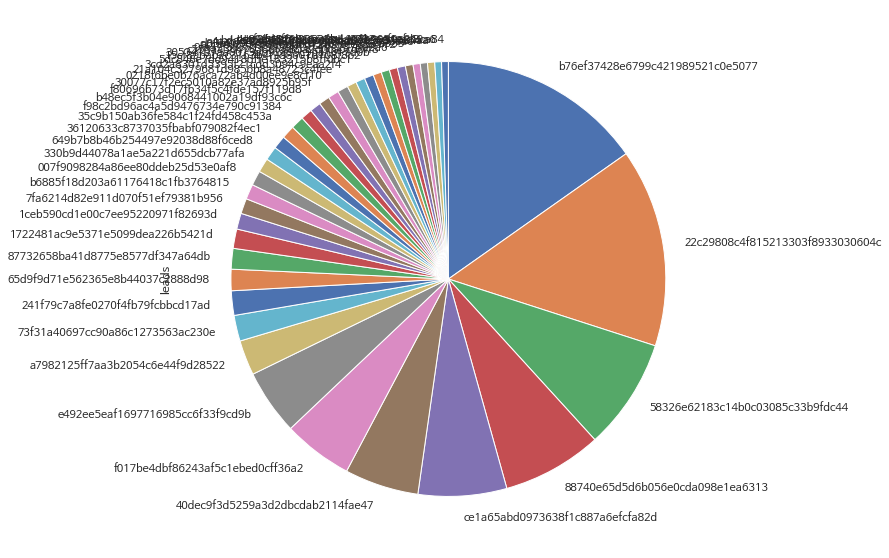

In [73]:
# 잠재 리드가 접한 랜딩 페이지의 비중 비교
seller_cvr.sort_values(by='leads', ascending = False)['leads'].plot.pie(startangle = 90, counterclock=False)

In [74]:
# 주문 전환율이 높은 상위 5개 랜딩 페이지
order_cvr.head(5)

,leads,sellers_contracted,sellers_ordered,seller_conversion_rate(%),order_conversion_rate(%)
landing_page_id,,,,,
4e82dd1f6d00626bda0723eef0a269a6,30,1,1.0,3.333333,100.0
3cd2a8301d5395f21cdd3094c9eaa2f4,42,1,1.0,2.380952,100.0
4aab772aeb9833c170d8ea5413e02eac,32,4,3.0,12.500000,75.0
a0fbc0263cb98bdb0d72b9f9f283a172,36,4,3.0,11.111111,75.0
73f31a40697cc90a86c1273563ac230e,115,4,3.0,3.478261,75.0


In [75]:
# 랜딩 페이지에 접근한 리드 수와 전환율을 같이 본다면? (b2b 데이터 참고)

#### 2️⃣ first_contact_date에 따른 landing_page_id 별 전환율 추이

In [76]:
# first_contact_date를 연-월로 표기 -> first_contact_month 컬럼 추가
mf_landing_final['first_contact_month'] = pd.to_datetime(mf_landing_final['first_contact_date']).dt.to_period('M')
mf_orders_landing_final['first_contact_month'] = pd.to_datetime(mf_orders_landing_final['first_contact_date']).dt.to_period('M')

<ipython-input-76-6d1ee3750901>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
mf_landing_final.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_month,leads
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02,445
1,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12,445
2,8e7af20b649bd58357ffc4aa7cf5e88f,2018-02-08,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02,445
3,936c567e63dabf5ab46ed2440f376fc8,2018-02-20,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02,445
4,aa839cfb74f9e5ae2a89572a0093dd58,2018-01-29,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01,445


In [78]:
mf_orders_landing_final.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_purchase_timestamp,first_contact_month,leads
0,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-06-20 21:40:18,2018-02,51
1,6548cf02964800e58014e5040bb14e01,2017-11-14,b48ec5f3b04e9068441002a19df93c6c,paid_search,88cd3681e0a2ba85e190f7d817629c4c,b90f87164b5f8c2cfa5c8572834dbe3f,2695de1affa7750089c0455f8ce27021,2018-07-09 18:00:57,car_accessories,online_big,eagle,NaN,NaN,NaN,reseller,NaN,0.0,2018-08-15 21:09:19,2017-11,51
2,327174d3648a2d047e8940d7d15204ca,2018-04-03,1ceb590cd1e00c7ee95220971f82693d,organic_search,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-06-11 14:32:25,2018-04,71
3,ab11f58a6bf7036a656364b0ba68fb74,2018-04-05,1ceb590cd1e00c7ee95220971f82693d,paid_search,9e7c5f4d7770eab65738cca38f9efccf,068066e24f0c643eb1d089c7dd20cd73,de63de0d10a6012430098db33c679b0b,2018-04-10 03:00:00,sports_leisure,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-06-01 12:50:14,2018-04,71
4,e0bcbf50b9afa71ee130b94dfe8bcf2e,2018-05-02,1ceb590cd1e00c7ee95220971f82693d,paid_search,516e7738bd8f735ac19a010ee5450d8d,9d12ef1a7eca3ec58c545c678af7869c,495d4e95a8cf8bbf8b432b612a2aa328,2018-05-08 13:32:34,health_beauty,online_small,cat,NaN,NaN,NaN,reseller,NaN,0.0,2018-05-11 18:34:36,2018-05,71


In [79]:
# first_contact_month, landing_page_id 별 리드, 셀러, 판매 셀러 수 측정
# 리드 수
lead_per_landing_first_50 = pd.DataFrame(mf_landing_final.groupby(['first_contact_month','landing_page_id'])['mql_id'].count().sort_values(ascending = False)) 
lead_per_landing_first_50.rename(columns = {'mql_id' : 'leads'}, inplace = True)

# 판매자 전환 수
seller_per_landing_first_50 = pd.DataFrame(mf_landing_final.groupby(['first_contact_month','landing_page_id'])['seller_id'].count().sort_values(ascending = False)) 
seller_per_landing_first_50.rename(columns = {'seller_id' : 'sellers_contracted'}, inplace = True)

# 주문 전환 수
seller_ordered_per_landing_first_50 = pd.DataFrame(mf_orders_landing_final.groupby(['first_contact_month','landing_page_id'])['seller_id'].count().sort_values(ascending = False)) 
seller_ordered_per_landing_first_50.rename(columns = {'seller_id' : 'sellers_ordered'}, inplace = True)


In [80]:
lead_per_landing_first_50

leads
first_contact_month landing_page_id                        
2018-04             58326e62183c14b0c03085c33b9fdc44    233
2018-05             58326e62183c14b0c03085c33b9fdc44    221
2018-04             22c29808c4f815213303f8933030604c    167
2018-05             22c29808c4f815213303f8933030604c    161
2018-01             b76ef37428e6799c421989521c0e5077    160
...                                                     ...
2017-11             d83b0d0e48c8447d1d5507a44027a955      1
                    a0fbc0263cb98bdb0d72b9f9f283a172      1
2017-10             4e82dd1f6d00626bda0723eef0a269a6      1
                    87732658ba41d8775e8577df347a64db      1
2018-03             35c9b150ab36fe584c1f24fd458c453a      1

[286 rows x 1 columns]

In [81]:
e = lead_per_landing_first_50.merge(seller_per_landing_first_50, how = 'left', on = ['first_contact_month','landing_page_id'])
conversion_per_landing_first_50 = e.merge(seller_ordered_per_landing_first_50, how = 'left', on = ['first_contact_month','landing_page_id'])
conversion_per_landing_first_50['sellers_ordered'].fillna(0, inplace = True)
conversion_per_landing_first_50['seller_conversion_rate(%)'] = conversion_per_landing_first_50['sellers_contracted'] / conversion_per_landing_first_50['leads'] * 100
conversion_per_landing_first_50['order_conversion_rate(%)'] = conversion_per_landing_first_50['sellers_ordered'] / conversion_per_landing_first_50['sellers_contracted'] * 100
conversion_per_landing_first_50.sort_values(by = (['first_contact_month', 'seller_conversion_rate(%)']), ascending = (True, False), inplace = True)
conversion_per_landing_first_50

leads  \
first_contact_month landing_page_id                           
2017-07             b76ef37428e6799c421989521c0e5077     21   
                    3cd2a8301d5395f21cdd3094c9eaa2f4     13   
                    22c29808c4f815213303f8933030604c     12   
                    e492ee5eaf1697716985cc6f33f9cd9b      6   
                    65d9f9d71e562365e8b44037c2888d98      6   
...                                                     ...   
2018-05             b48ec5f3b04e9068441002a19df93c6c      2   
                    007f9098284a86ee80ddeb25d53e0af8      2   
                    c555aa36478386fdf85a2d0ca5cd0ff8      1   
                    649b7b8b46b254497e92038d88f6ced8      1   
                    30077c17f2ec5010a82e37ad8925b95f      1   

                                                      sellers_contracted  \
first_contact_month landing_page_id                                        
2017-07             b76ef37428e6799c421989521c0e5077                   1   
                    3cd2a8301d5395f21cdd3094c9eaa2f4                   0   
                    22c29808c4f815213303f8933030604c                   0   
                    e492ee5eaf1697716985cc6f33f9cd9b                   0   
                    65d9f9d71e562365e8b44037c2888d98                   0   
...                                                                  ...   
2018-05             b48ec5f3b04e9068441002a19df93c6c                   0   
                    007f9098284a86ee80ddeb25d53e0af8                   0   
                    c555aa36478386fdf85a2d0ca5cd0ff8                   0   
                    649b7b8b46b254497e92038d88f6ced8                   0   
                    30077c17f2ec5010a82e37ad8925b95f                   0   

                                                      sellers_ordered  \
first_contact_month landing_page_id                                     
2017-07             b76ef37428e6799c421989521c0e5077              1.0   
                    3cd2a8301d5395f21cdd3094c9eaa2f4              0.0   
                    22c29808c4f815213303f8933030604c              0.0   
                    e492ee5eaf1697716985cc6f33f9cd9b              0.0   
                    65d9f9d71e562365e8b44037c2888d98              0.0   
...                                                               ...   
2018-05             b48ec5f3b04e9068441002a19df93c6c              0.0   
                    007f9098284a86ee80ddeb25d53e0af8              0.0   
                    c555aa36478386fdf85a2d0ca5cd0ff8              0.0   
                    649b7b8b46b254497e92038d88f6ced8              0.0   
                    30077c17f2ec5010a82e37ad8925b95f              0.0   

                                                      seller_conversion_rate(%)  \
first_contact_month landing_page_id                                               
2017-07             b76ef37428e6799c421989521c0e5077                   4.761905   
                    3cd2a8301d5395f21cdd3094c9eaa2f4                   0.000000   
                    22c29808c4f815213303f8933030604c                   0.000000   
                    e492ee5eaf1697716985cc6f33f9cd9b                   0.000000   
                    65d9f9d71e562365e8b44037c2888d98                   0.000000   
...                                                                         ...   
2018-05             b48ec5f3b04e9068441002a19df93c6c                   0.000000   
                    007f9098284a86ee80ddeb25d53e0af8                   0.000000   
                    c555aa36478386fdf85a2d0ca5cd0ff8                   0.000000   
                    649b7b8b46b254497e92038d88f6ced8                   0.000000   
                    30077c17f2ec5010a82e37ad8925b95f                   0.000000   

                                                      order_conversion_rate(%)  
first_contact_month landing_page_id                                             
2017-07             b76ef37428e6799c421989521c0e5077 

In [82]:
conversion_per_landing_first_50.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 286 entries, (Period('2017-07', 'M'), 'b76ef37428e6799c421989521c0e5077') to (Period('2018-05', 'M'), '30077c17f2ec5010a82e37ad8925b95f')
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   leads                      286 non-null    int64  
 1   sellers_contracted         286 non-null    int64  
 2   sellers_ordered            286 non-null    float64
 3   seller_conversion_rate(%)  286 non-null    float64
 4   order_conversion_rate(%)   126 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 13.6+ KB


In [83]:
# 파일로 저장 
conversion_per_landing_first_50.to_csv("/content/drive/MyDrive/olist/03_results/cvs_per_landing_trends.csv")

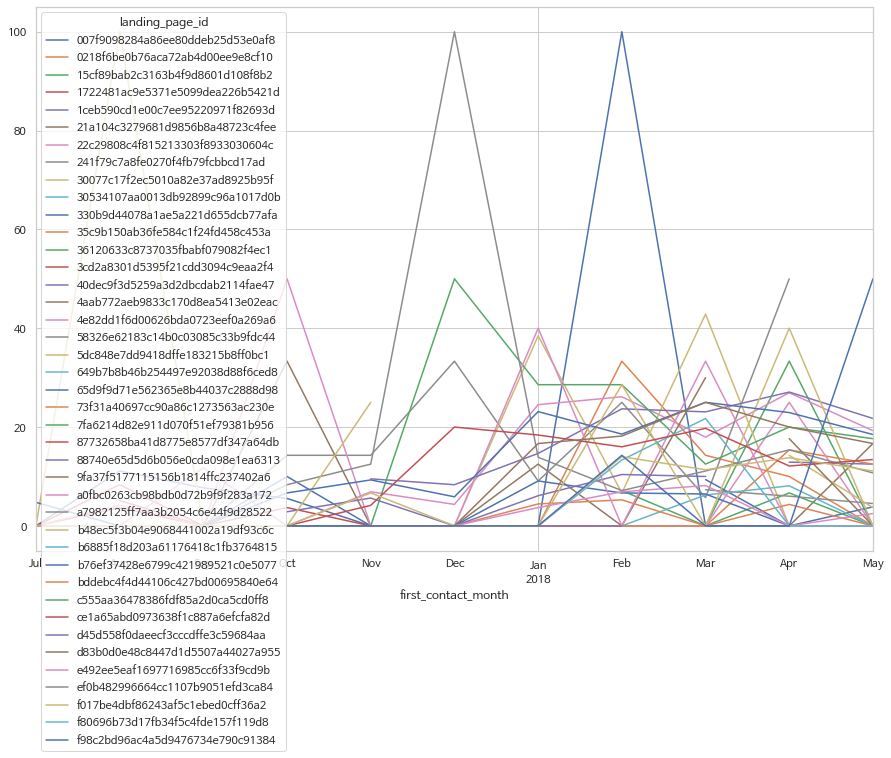

In [84]:
# seller_전환율 
# pivot table로 전환 
seller_conversion_per_landing_date_pivot = pd.pivot_table(conversion_per_landing_first_50, values='seller_conversion_rate(%)', columns=['landing_page_id'],
                    index=['first_contact_month'])
seller_conversion_per_landing_date_pivot.plot(figsize = (15, 10))

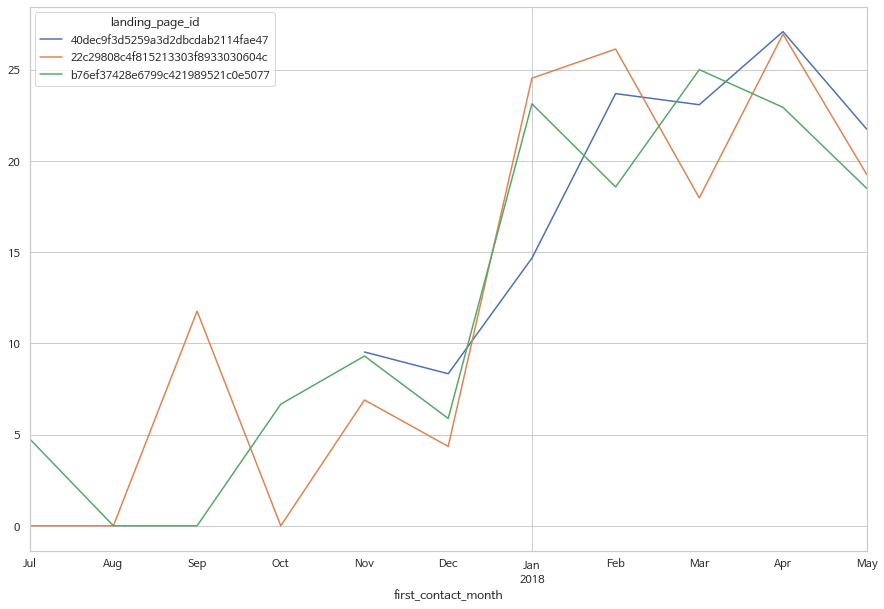

In [85]:
# 전체 상위 3개 페이지의 기간 별 추이 확인 -> 큰 의미가 없어서 분석에는 사용할 수 없음
seller_conversion_per_landing_top3 = seller_conversion_per_landing_date_pivot[['40dec9f3d5259a3d2dbcdab2114fae47', '22c29808c4f815213303f8933030604c', 'b76ef37428e6799c421989521c0e5077' ]]
seller_conversion_per_landing_top3.plot(figsize = (15, 10))

## 3. 계약을 체결한 셀러 미체결 리드의 차이

### 1) 전환 유저와 비전환 유저 데이터셋 준비

In [86]:
# 전환 유저만 골라보기

In [87]:
seller_converted = mf.loc[mf['seller_id'].notna()]

In [88]:
# 비전환 유저만 골라보기
seller_not_converted = mf.loc[mf['seller_id'].isna()]

In [89]:
# 차이를 볼 수 있는 요소 : landing_page_id, origin,  sdr_id, sr_id,  won_date-first_contact_date, business_segment, business_type, declared_montly_revenue, lead_type, lead_behaviour_profile
seller_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 4 to 7999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   first_contact_date             842 non-null    datetime64[ns]
 2   landing_page_id                842 non-null    object        
 3   origin                         842 non-null    object        
 4   seller_id                      842 non-null    object        
 5   sdr_id                         842 non-null    object        
 6   sr_id                          842 non-null    object        
 7   won_date                       842 non-null    datetime64[ns]
 8   business_segment               841 non-null    object        
 9   lead_type                      836 non-null    object        
 10  lead_behaviour_profile         665 non-null    object        
 11  has_company       

### 2) 차이 분석

#### 1️⃣ First_contact_date

In [90]:
# 전환 유저의 first_contact_month는?
seller_converted['first_contact_month'] = pd.to_datetime(seller_converted['first_contact_date']).dt.to_period('M')
seller_not_converted['first_contact_month'] = pd.to_datetime(seller_not_converted['first_contact_date']).dt.to_period('M')
mql_seller_converted_per_fcm = pd.DataFrame(seller_converted.groupby('first_contact_month')['mql_id'].count())
mql_seller_not_converted_per_fcm = pd.DataFrame(seller_not_converted.groupby('first_contact_month')['mql_id'].count())

mql_seller_converted_per_fcm.rename(columns = {'mql_id' : 'seller_converted'}, inplace = True)
mql_seller_not_converted_per_fcm.rename(columns = {'mql_id' : 'not_converted'}, inplace = True)

first_contact_with_conversion = mql_seller_converted_per_fcm.merge(mql_seller_not_converted_per_fcm, how = 'left', on = 'first_contact_month')
first_contact_with_conversion.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 11 entries, 2017-07 to 2018-05
Freq: M
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   seller_converted  11 non-null     int64
 1   not_converted     11 non-null     int64
dtypes: int64(2)
memory usage: 264.0 bytes


<ipython-input-90-b47760a07d68>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-90-b47760a07d68>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
first_contact_with_conversion['contact_leads'] = first_contact_with_conversion['seller_converted']+first_contact_with_conversion['not_converted']
first_contact_with_conversion['conversion_rate(%)'] = (first_contact_with_conversion['seller_converted'] / (first_contact_with_conversion['seller_converted']+first_contact_with_conversion['not_converted']))*100


In [92]:
first_contact_with_conversion

,seller_converted,not_converted,contact_leads,conversion_rate(%)
first_contact_month,,,,
2017-07,2,237,239,0.836820
2017-08,9,377,386,2.331606
2017-09,7,305,312,2.243590
2017-10,14,402,416,3.365385
2017-11,18,427,445,4.044944
2017-12,11,189,200,5.500000
2018-01,152,989,1141,13.321648
2018-02,149,879,1028,14.494163
2018-03,167,1007,1174,14.224872


In [93]:
first_contact_with_conversion.to_csv("/content/drive/MyDrive/olist/03_results/difference_00_first_contact_month.csv")

#### 2️⃣ Landing_page

In [94]:
# landing_page_id 비중

mql_seller_converted_per_landing = pd.DataFrame(seller_converted.groupby('landing_page_id')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
mql_seller_not_converted_per_landing = pd.DataFrame(seller_not_converted.groupby('landing_page_id')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)


mql_seller_converted_per_landing.rename(columns = {'mql_id' : 'seller_converted'}, inplace = True)
mql_seller_not_converted_per_landing.rename(columns = {'mql_id' : 'not_converted'}, inplace = True)

landing_with_conversion = mql_seller_converted_per_landing.merge(mql_seller_not_converted_per_landing, how = 'left', on = 'landing_page_id')
landing_with_conversion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 22c29808c4f815213303f8933030604c to ffc62d6945fd1423539ec6d96326c37c
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seller_converted  134 non-null    int64  
 1   not_converted     98 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 3.1+ KB


In [95]:
# 리드 수가 30명 이상인 landing_page로 한정하기
landing_with_conversion_30 = landing_with_conversion.loc[landing_with_conversion.index.isin(conversion_per_landing_30.index)]

In [96]:
# 데이터 출력용 (시각화가 어려워 구글 스프레드 시트로 대체)
landing_with_conversion_30.to_csv("/content/drive/MyDrive/olist/03_results/difference_01_landing_page.csv")

#### 3️⃣ 유입경로

In [97]:
mql_seller_converted_per_origin = pd.DataFrame(seller_converted.groupby('origin')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
mql_seller_not_converted_per_origin = pd.DataFrame(seller_not_converted.groupby('origin')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)


mql_seller_converted_per_origin.rename(columns = {'mql_id' : 'seller_converted'}, inplace = True)
mql_seller_not_converted_per_origin.rename(columns = {'mql_id' : 'not_converted'}, inplace = True)

origin_with_conversion = mql_seller_converted_per_origin.merge(mql_seller_not_converted_per_origin, how = 'left', on = 'origin')
origin_with_conversion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, organic_search to other_publicities
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   seller_converted  9 non-null      int64
 1   not_converted     9 non-null      int64
dtypes: int64(2)
memory usage: 216.0+ bytes


In [98]:
#origin_with_conversion.to_csv("/content/drive/MyDrive/olist/03_results/difference_02_origin.csv")

##4. 계약을 체결한 셀러들의 특성으로 판매자 계약 전환율 끌어올리기 (분석 제외)
- 분석에 사용하지 못한 이유 : 계약 미체결 셀러의 특성은 알 수 없었기 때문
- 부연 설명 : 계약 된 셀러들의 특징을 간접적으로 활용할 수는 있지만, input이 없으므로 해당 세그먼트가 효율적인지 측정하는 데 한계가 있음 

In [103]:
# 셀러로 전환한 리드들의 정보를 다시 한번 확인 
# 이 중 cd 테이블 (계약) 정보를 바탕으로 판매자의 특성 파악
seller_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 4 to 7999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         842 non-null    object        
 1   first_contact_date             842 non-null    datetime64[ns]
 2   landing_page_id                842 non-null    object        
 3   origin                         842 non-null    object        
 4   seller_id                      842 non-null    object        
 5   sdr_id                         842 non-null    object        
 6   sr_id                          842 non-null    object        
 7   won_date                       842 non-null    datetime64[ns]
 8   business_segment               841 non-null    object        
 9   lead_type                      836 non-null    object        
 10  lead_behaviour_profile         665 non-null    object        
 11  has_company       

### 1) sdr, sr 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

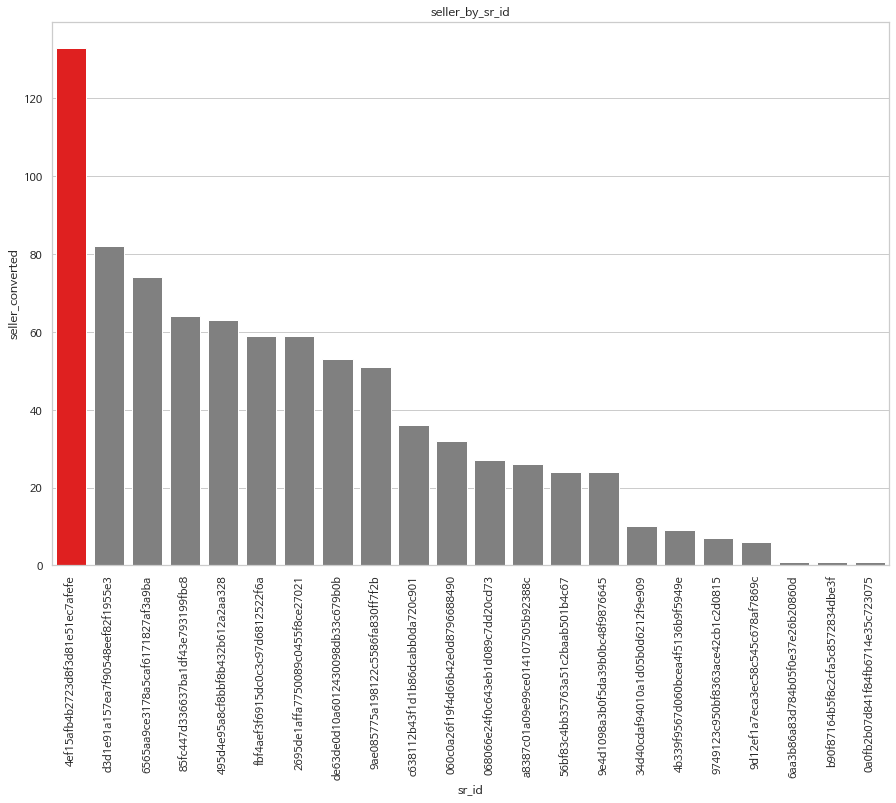

In [104]:
# sr_id 별 seller 수 비교 -> 상위 
seller_per_sr = pd.DataFrame(seller_converted.groupby('sr_id')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
seller_per_sr.rename(columns = {'mql_id' : 'seller_converted'},inplace = True)
seller_per_sr.reset_index(inplace = True)
seller_per_sr.sort_values(by = 'seller_converted', ascending = False, inplace = True)
colors = ['grey' if (x < max(seller_per_sr['seller_converted'])) else 'red' for x in seller_per_sr['seller_converted']]
ax = sns.barplot(data = seller_per_sr, x = 'sr_id', y = 'seller_converted', palette = colors).set(title = 'seller_by_sr_id')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text major ticklabel objects>)

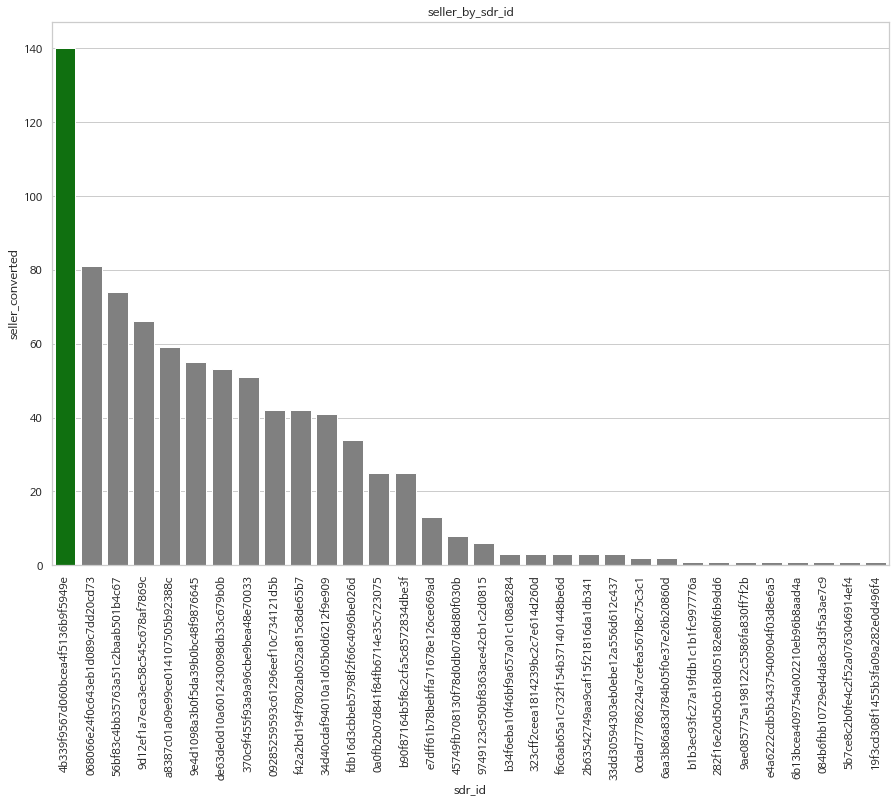

In [105]:
seller_per_sdr = pd.DataFrame(seller_converted.groupby('sdr_id')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
seller_per_sdr.rename(columns = {'mql_id' : 'seller_converted'},inplace = True)
seller_per_sdr.reset_index(inplace = True)
seller_per_sdr.sort_values(by = 'seller_converted', ascending = False, inplace = True)
colors2 = ['grey' if (x < max(seller_per_sdr['seller_converted'])) else 'green' for x in seller_per_sdr['seller_converted']]
ax = sns.barplot(data = seller_per_sdr, x = 'sdr_id', y = 'seller_converted', palette = colors2).set(title = 'seller_by_sdr_id')
plt.xticks(rotation = 90)

In [106]:
# sr_id, sdr_id 별 seller 수 출력
seller_per_sdr_sr = pd.DataFrame(seller_converted.groupby(['sr_id', 'sdr_id'])['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
seller_per_sdr_sr.rename(columns = {'mql_id' : 'seller_converted'}, inplace = True)
seller_per_sdr_sr.head(10)

seller_converted
sr_id                            sdr_id                                            
4ef15afb4b2723d8f3d81e51ec7afefe 4b339f9567d060bcea4f5136b9f5949e                21
d3d1e91a157ea7f90548eef82f1955e3 de63de0d10a6012430098db33c679b0b                19
6565aa9ce3178a5caf6171827af3a9ba 4b339f9567d060bcea4f5136b9f5949e                18
4ef15afb4b2723d8f3d81e51ec7afefe de63de0d10a6012430098db33c679b0b                16
                                 56bf83c4bb35763a51c2baab501b4c67                16
fbf4aef3f6915dc0c3c97d6812522f6a 4b339f9567d060bcea4f5136b9f5949e                14
d3d1e91a157ea7f90548eef82f1955e3 4b339f9567d060bcea4f5136b9f5949e                14
c638112b43f1d1b86dcabb0da720c901 56bf83c4bb35763a51c2baab501b4c67                13
4ef15afb4b2723d8f3d81e51ec7afefe 9d12ef1a7eca3ec58c545c678af7869c                13
                                 a8387c01a09e99ce014107505b92388c                12

In [107]:
# 피벗 테이블로 변경

seller_per_sdr_sr = pd.pivot_table(seller_per_sdr_sr, values='seller_converted', columns=['sr_id'],index=['sdr_id'])

[Text(0.5, 1.0, 'Number of seller by sdr, sr')]

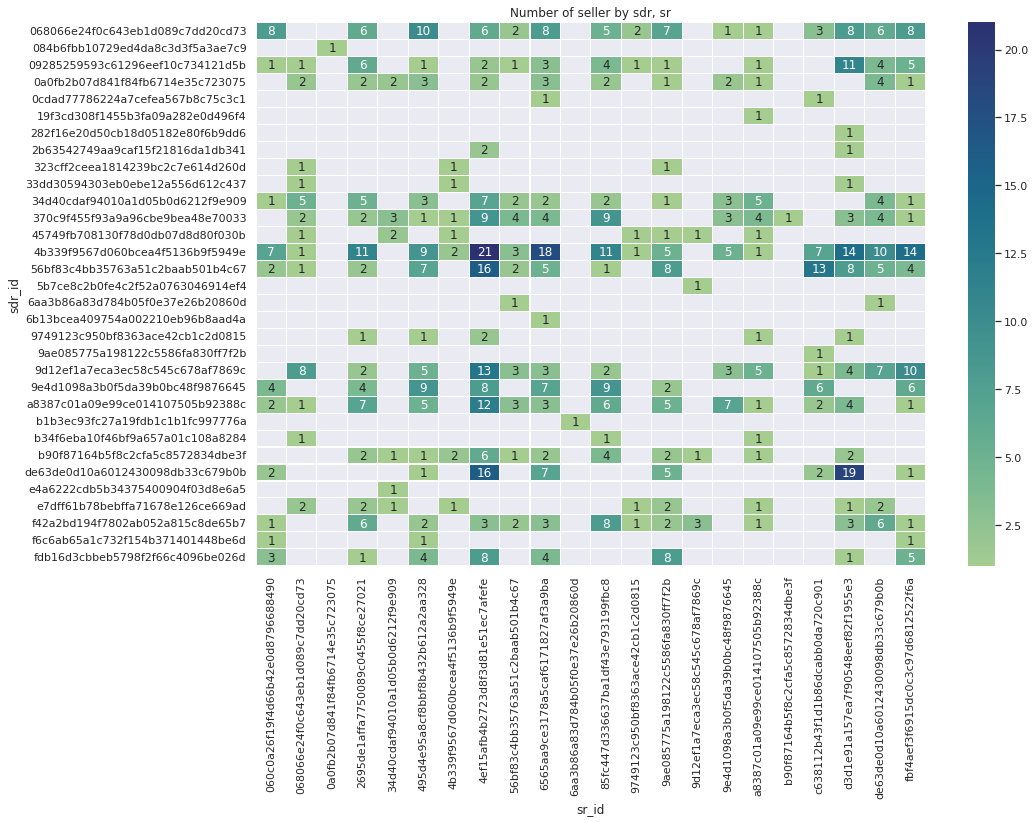

In [108]:
# heatmap으로 sdr, sr 조합 확인
sns.set(rc = {'figure.figsize' : (15, 10)})
fig = sns.heatmap(seller_per_sdr_sr, annot = True, linewidth = 0.05, cmap = "crest").set(title = 'Number of seller by sdr, sr')
fig

### 2) business_segment 와 business type

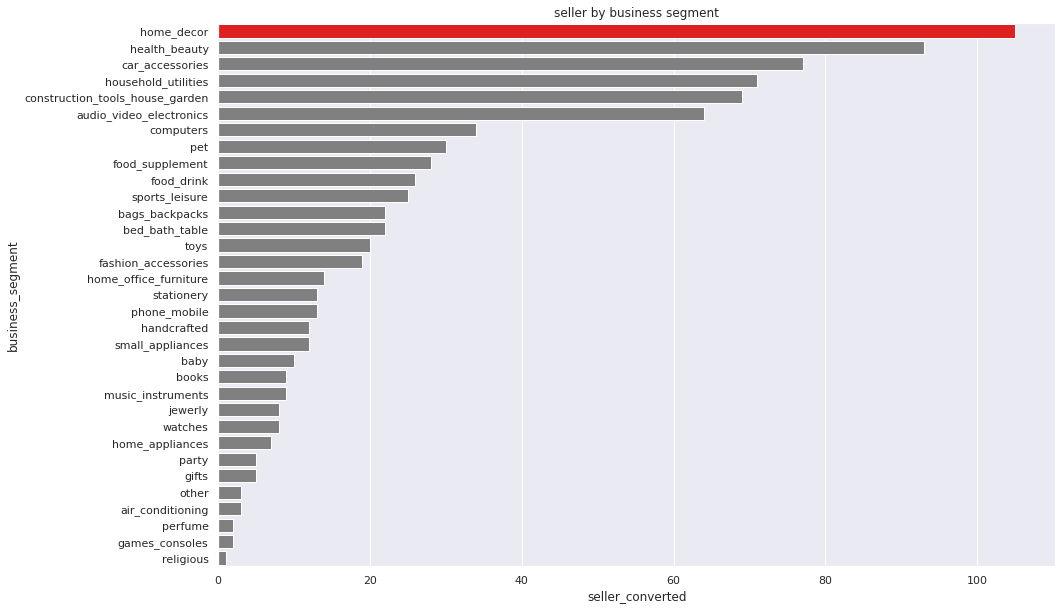

In [109]:
# 비즈니스 세그먼트
seller_per_bs = pd.DataFrame(seller_converted.groupby('business_segment')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
seller_per_bs.rename(columns = {'mql_id' : 'seller_converted'},inplace = True)
seller_per_bs.reset_index(inplace = True)
seller_per_bs.sort_values(by = 'seller_converted', ascending = False, inplace = True)
colors = ['grey' if (x < max(seller_per_bs['seller_converted'])) else 'red' for x in seller_per_bs['seller_converted']]
ax = sns.barplot(data = seller_per_bs, x = 'seller_converted', y = 'business_segment', palette = colors, orient = "h" ).set(title = 'seller by business segment')

Text(0.5, 1.0, 'Pie Chart of #of Sellers by Business type')

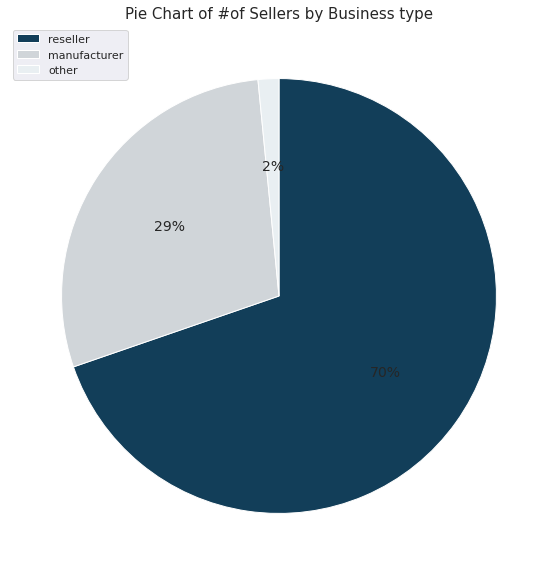

In [110]:
# 비즈니스 타입
seller_per_bt = pd.DataFrame(seller_converted.groupby('business_type')['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
seller_per_bt.rename(columns = {'mql_id' : 'seller_converted'},inplace = True)
seller_per_bt.reset_index(inplace = True)
seller_per_bt.sort_values(by = 'seller_converted', ascending = False, inplace = True)
# colors = ['grey' if (x < max(seller_per_bt['seller_converted'])) else 'green' for x in seller_per_bt['seller_converted']]
# ax = sns.barplot(data = seller_per_bt, x = 'seller_converted', y = 'business_type', palette = colors, orient = "h" ).set(title = 'seller by business type')
ax = plt.pie(seller_per_bt['seller_converted'], startangle=90, counterclock=False, colors = ['#123E59', '#D0D5D9', '#E9EFF2'], autopct='%1.0f%%', textprops={'fontsize': 14})
plt.legend(seller_per_bt['business_type'], loc="upper left")
plt.title('Pie Chart of #of Sellers by Business type', fontsize=15)

In [111]:
# sr_id, sdr_id 별 seller 수 출력
seller_per_business = pd.DataFrame(seller_converted.groupby(['business_segment', 'business_type'])['mql_id'].count()).sort_values(by = 'mql_id', ascending = False)
seller_per_business.rename(columns = {'mql_id' : 'seller_converted'}, inplace = True)
seller_per_business.head(10)

,,seller_converted
business_segment,business_type,
health_beauty,reseller,67
car_accessories,reseller,67
home_decor,manufacturer,59
audio_video_electronics,reseller,58
construction_tools_house_garden,reseller,51
household_utilities,reseller,48
home_decor,reseller,45
computers,reseller,34
health_beauty,manufacturer,25


Text(0.5, 1.0, '#resellers by Business segment')

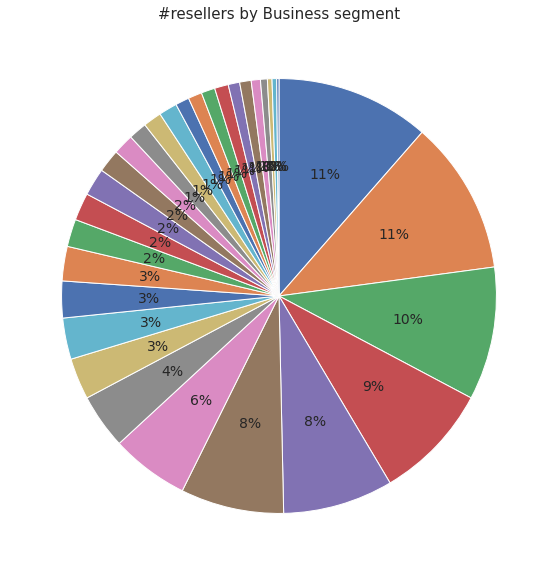

In [112]:
seller_per_business_groupby = seller_per_business.reset_index()
seller_per_business_reseller = seller_per_business_groupby.loc[seller_per_business_groupby['business_type'] == 'reseller', ['business_segment', 'seller_converted']]
ax = plt.pie(seller_per_business_reseller['seller_converted'], startangle=90, counterclock=False, autopct='%1.0f%%', textprops={'fontsize': 14})
# plt.legend(seller_per_bt['business_type'], loc="upper right")
plt.title('#resellers by Business segment', fontsize=15)

Text(0.5, 1.0, '#manufacturers by Business segment')

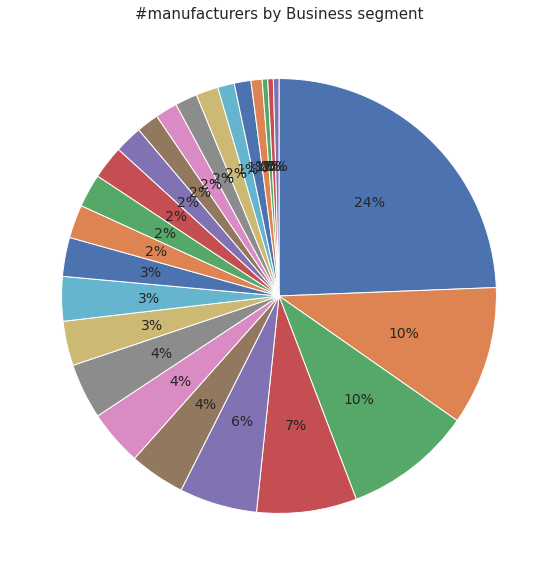

In [113]:
seller_per_business_groupby = seller_per_business.reset_index()
seller_per_business_manufact = seller_per_business_groupby.loc[seller_per_business_groupby['business_type'] == 'manufacturer', ['business_segment', 'seller_converted']]
ax = plt.pie(seller_per_business_manufact['seller_converted'], startangle=90, counterclock=False, autopct='%1.0f%%', textprops={'fontsize': 14})
# plt.legend(seller_per_bt['business_type'], loc="upper right")
plt.title('#manufacturers by Business segment', fontsize=15)

In [114]:
# 피벗 테이블로 변경

seller_per_business = pd.pivot_table(seller_per_business, values='seller_converted', columns=['business_type'],index=['business_segment'])

[Text(0.5, 1.0, 'Number of seller by business type and segment')]

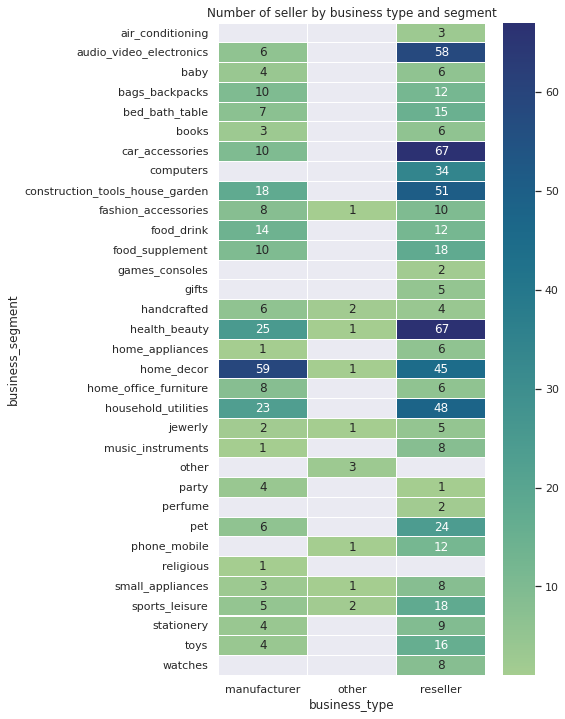

In [115]:
sns.set(rc = {'figure.figsize' : (6, 12)})
fig = sns.heatmap(seller_per_business, annot = True, linewidth = 0.05, cmap = "crest").set(title = 'Number of seller by business type and segment')
fig

### 3) declared_monthly_revenue (예상 판매 금액) -> 사용 불가 -> 0.0으로 기재한 셀러가 790명으로 분포를 보는 데 의미가 없음

In [116]:
# 데이터 타입 변경
seller_converted['declared_monthly_revenue'] = seller_converted['declared_monthly_revenue'].astype(str).astype(float)

<ipython-input-116-eb6acfb45839>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
# 0으로 기재한 셀러가 너무 많아 분포 의미 없음을 확인
seller_converted['declared_monthly_revenue'].value_counts()

0.0           797
100000.0        5
20000.0         3
30000.0         3
10000.0         3
25000.0         3
15000.0         2
120000.0        2
50000.0         2
60000.0         2
300000.0        2
5000.0          2
250000.0        2
210000.0        1
8000000.0       1
40000.0         1
50000000.0      1
4000.0          1
150000.0        1
6.0             1
1000.0          1
180000.0        1
500000.0        1
130000.0        1
6000.0          1
8000.0          1
200000.0        1
Name: declared_monthly_revenue, dtype: int64

##5. 판매자의 판매 전환율 올리기 (분석 목적에 부적합)
- 분석 목표는 판매자 영입에 집중하는 것 -> 판매자의 전환율 제고는 분석에 적합하지 않다. 

### 1) 준비 과정

#### 1️⃣ 전환, 비전환 테이블셋 ver1.

In [119]:
order_converted = mf_orders.loc[mf_orders['order_purchase_timestamp'].notna()]
order_not_converted = mf_orders.loc[mf_orders['order_purchase_timestamp'].isna() & mf_orders['seller_id'].notna()]
order_not_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 12 to 7999
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         462 non-null    object        
 1   first_contact_date             462 non-null    datetime64[ns]
 2   landing_page_id                462 non-null    object        
 3   origin                         462 non-null    object        
 4   seller_id                      462 non-null    object        
 5   sdr_id                         462 non-null    object        
 6   sr_id                          462 non-null    object        
 7   won_date                       462 non-null    datetime64[ns]
 8   business_segment               461 non-null    object        
 9   lead_type                      459 non-null    object        
 10  lead_behaviour_profile         376 non-null    object        
 11  has_company      

#### 2️⃣ 판매를 못하는 걸까? 시기적인 문제인 걸까?
- 판매 주기를 벗어났는데도 판매를 못하는 경우라면 문제가 될 수 있다. 
- 다음에 판매 전환율을 끌어올리고 싶다면 분석을 따로 진행하는 것이 낫다.

In [124]:
# Olist order 데이터를 보면, 2018년 10월 17일까지의 주문이 확인됨 
orders['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

<ipython-input-125-c6717fcb3dfd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0.5, 1.0, 'First order Leadtime after closed_deals')

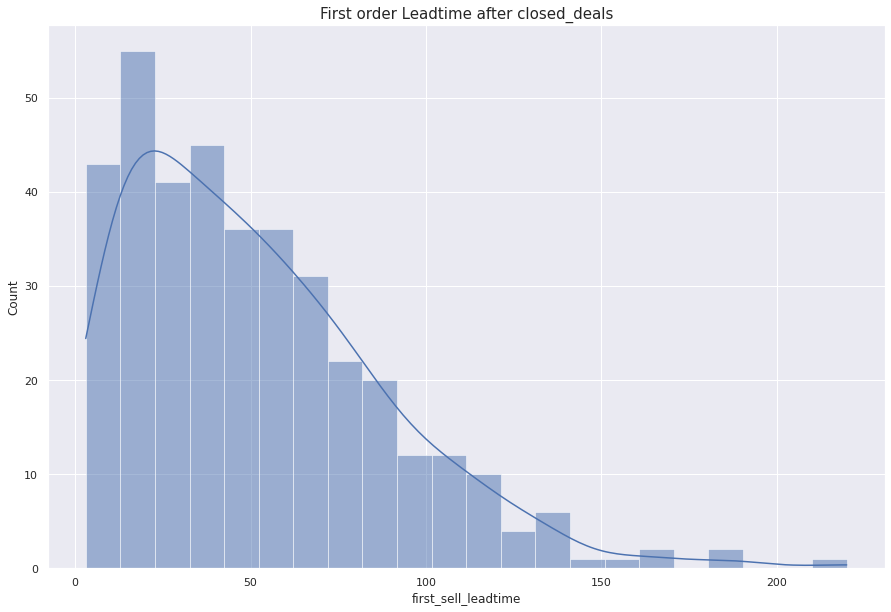

In [125]:
# 주문 전환이 됐던 셀러들의 첫 주문 리드타임 분포는 어떻게 되는가?
order_converted['first_sell_leadtime'] = np.floor((order_converted['order_purchase_timestamp'] - order_converted['won_date']) / np.timedelta64(1, 'D'))
sns.set(rc = {'figure.figsize' : (15, 10)})
sns.histplot(order_converted, x = 'first_sell_leadtime', bins = 22, kde = True, linewidth = 0.5).set_title("First order Leadtime after closed_deals", fontsize = 15)

In [126]:
order_converted['first_sell_leadtime'].describe()

count    380.000000
mean      51.284211
std       36.680295
min        3.000000
25%       22.000000
50%       44.000000
75%       72.000000
max      220.000000
Name: first_sell_leadtime, dtype: float64

Text(0.5, 1.0, 'First order Leadtime after closed_deals by business_type')

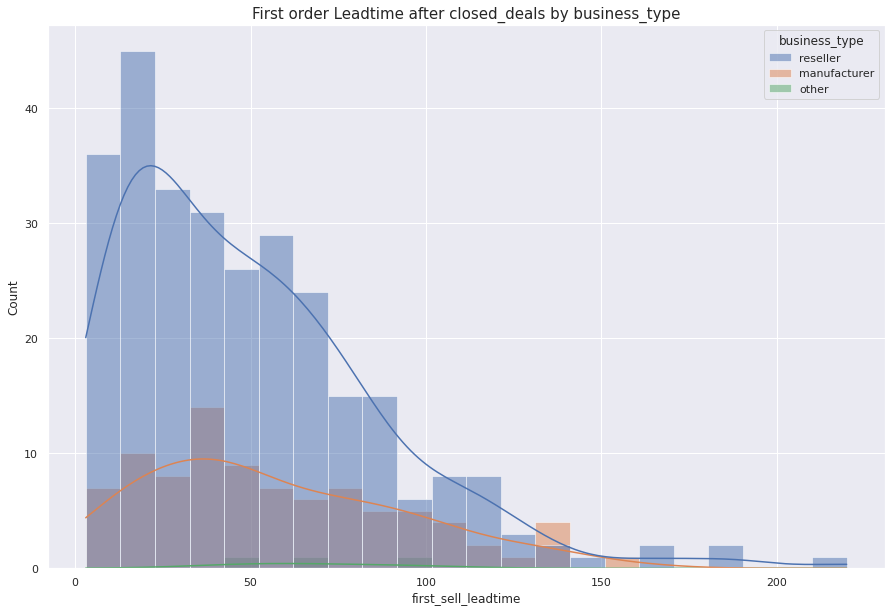

In [127]:
# 비즈니스 타입 별로 보면 리셀러가 좀더 빨리 팔고, 제조사는 10일 정도 리드타임이 늦다. 
sns.histplot(order_converted, x = 'first_sell_leadtime', bins = 22, kde = True, hue = 'business_type', linewidth = 0.5).set_title("First order Leadtime after closed_deals by business_type", fontsize = 15)

In [128]:
order_converted.loc[order_converted['business_type'] == 'reseller', 'first_sell_leadtime'].describe()

count    287.000000
mean      49.296167
std       36.674901
min        3.000000
25%       20.000000
50%       42.000000
75%       70.000000
max      220.000000
Name: first_sell_leadtime, dtype: float64

In [129]:
order_converted.loc[order_converted['business_type'] == 'manufacturer', 'first_sell_leadtime'].describe()

count     90.000000
mean      57.077778
std       36.595029
min        4.000000
25%       29.000000
50%       47.500000
75%       80.500000
max      158.000000
Name: first_sell_leadtime, dtype: float64

In [130]:
# 첫 주문이 없는 셀러들의 지금(order 데이터셋 마지막 주문일)까지의 리드타임을 구해보자. 
order_not_converted['olist_last_order_date'] = orders['order_purchase_timestamp'].max()
order_not_converted['lead_time_from_won_date'] = np.floor((order_not_converted['olist_last_order_date'] - order_not_converted['won_date']) / np.timedelta64(1, 'D'))
order_not_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 12 to 7999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         462 non-null    object        
 1   first_contact_date             462 non-null    datetime64[ns]
 2   landing_page_id                462 non-null    object        
 3   origin                         462 non-null    object        
 4   seller_id                      462 non-null    object        
 5   sdr_id                         462 non-null    object        
 6   sr_id                          462 non-null    object        
 7   won_date                       462 non-null    datetime64[ns]
 8   business_segment               461 non-null    object        
 9   lead_type                      459 non-null    object        
 10  lead_behaviour_profile         376 non-null    object        
 11  has_company      

<ipython-input-130-acf8b0692289>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-130-acf8b0692289>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [131]:
order_not_converted['lead_time_from_won_date'].describe()

count    462.000000
mean     160.876623
std       75.747468
min      -29.000000
25%      119.250000
50%      176.000000
75%      217.000000
max      316.000000
Name: lead_time_from_won_date, dtype: float64

Text(0.5, 1.0, 'Time after closed_deals')

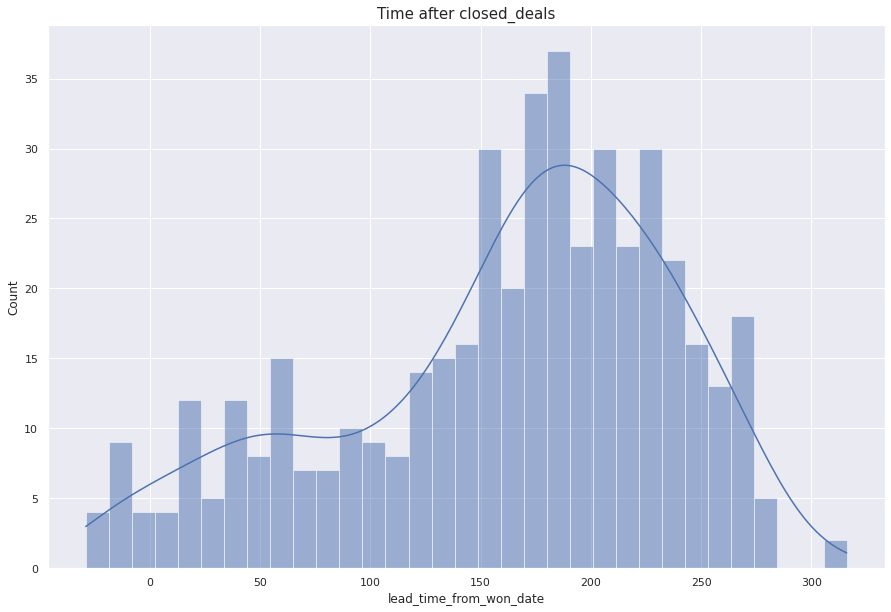

In [132]:
# 대부분이 70일을 넘어서 주문을 못 받고 있으므로 문제가 있다고 할 수 있음
sns.histplot(order_not_converted, x = 'lead_time_from_won_date', bins = 33, kde = True, linewidth = 0.5).set_title("Time after closed_deals", fontsize = 15)

Text(0.5, 1.0, 'Time after closed_deals')

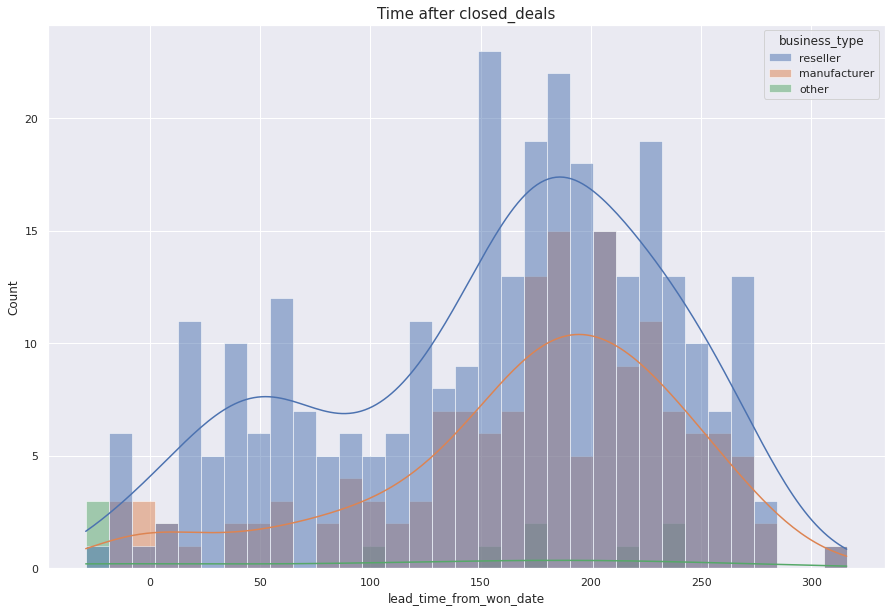

In [133]:
# 비즈니스 타입별로 보더라도 70-80일 정도가 넘어가면 문제가 있다고 볼 수 있다.
sns.histplot(order_not_converted, x = 'lead_time_from_won_date', bins = 33, kde = True, hue = 'business_type', linewidth = 0.5).set_title("Time after closed_deals", fontsize = 15)

#### 3️⃣ 비전환 테이블셋 ver2.

In [134]:
#판매 전환이 없는 셀러에서도 olist 데이터셋에서 마지막 주문일로부터 70일이 넘어가는 경우만 비교해서 확인한다. 
order_not_converted_80 = order_not_converted.loc[order_not_converted['lead_time_from_won_date'] > 80]
order_not_converted_80.info()
order_converted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 12 to 7999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   mql_id                         376 non-null    object        
 1   first_contact_date             376 non-null    datetime64[ns]
 2   landing_page_id                376 non-null    object        
 3   origin                         376 non-null    object        
 4   seller_id                      376 non-null    object        
 5   sdr_id                         376 non-null    object        
 6   sr_id                          376 non-null    object        
 7   won_date                       376 non-null    datetime64[ns]
 8   business_segment               375 non-null    object        
 9   lead_type                      374 non-null    object        
 10  lead_behaviour_profile         294 non-null    object        
 11  has_company      

### 2) 전환, 비전환 차이 비교

#### 1️⃣ 비즈니스 세그먼트

In [135]:
# 테이블 준비
order_converted_per_bs = pd.DataFrame(order_converted.groupby('business_segment')['seller_id'].count()).sort_values(by = 'seller_id', ascending = False)
order_not_converted_per_bs = pd.DataFrame(order_not_converted_80.groupby('business_segment')['seller_id'].count()).sort_values(by = 'seller_id', ascending = False)


order_converted_per_bs.rename(columns = {'seller_id' : 'order_converted'}, inplace = True)
order_not_converted_per_bs.rename(columns = {'seller_id' : 'not_converted'}, inplace = True)

bs_per_order_conversion = order_converted_per_bs.merge(order_not_converted_per_bs, how = 'left', on = 'business_segment')
bs_per_order_conversion['total'] = bs_per_order_conversion['order_converted'] + bs_per_order_conversion['not_converted']
bs_per_order_conversion['order_conversion_rate(%)'] = bs_per_order_conversion['order_converted'] / bs_per_order_conversion['total']*100

# 그래프를 만들기 위한 테이블 생성 
bs_per_order_conversion_bar = bs_per_order_conversion.reset_index().melt(id_vars = 'business_segment', value_vars = ['order_converted', 'not_converted'], var_name = 'status', value_name = 'number_of_seller')
bs_per_order_conversion_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   business_segment  58 non-null     object
 1   status            58 non-null     object
 2   number_of_seller  58 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [136]:
bs_per_order_conversion.sort_values(by = 'total', ascending = False).head(10).sort_values(by = 'order_conversion_rate(%)', ascending = True)

,order_converted,not_converted,total,order_conversion_rate(%)
business_segment,,,,
food_supplement,8,19,27,29.629630
computers,12,18,30,40.000000
car_accessories,30,40,70,42.857143
home_decor,44,50,94,46.808511
health_beauty,45,42,87,51.724138
construction_tools_house_garden,32,26,58,55.172414
audio_video_electronics,31,23,54,57.407407
sports_leisure,14,10,24,58.333333
pet,17,12,29,58.620690


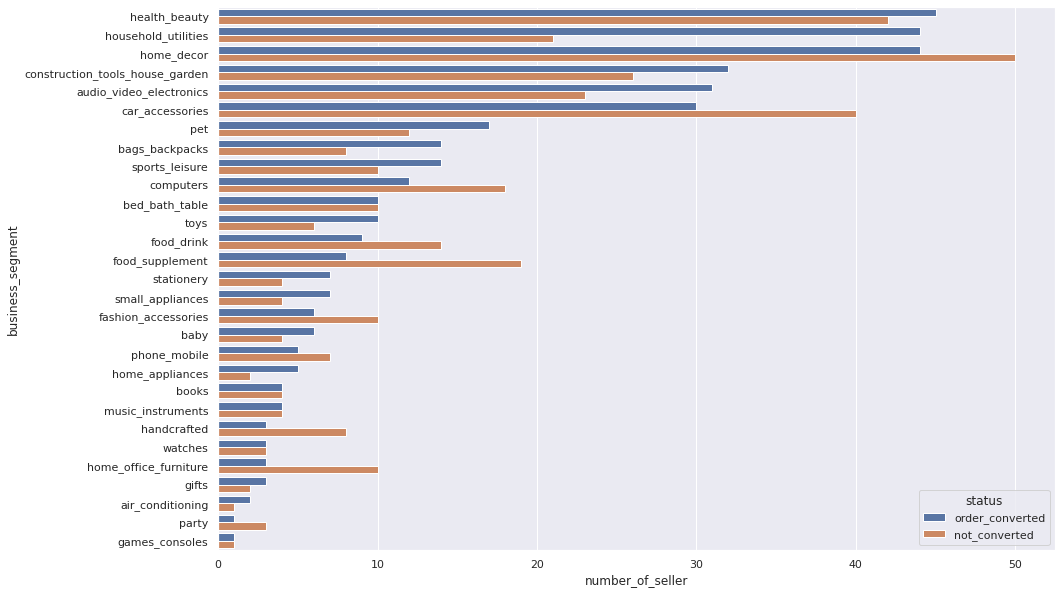

In [137]:
test_barplot = sns.barplot(data = bs_per_order_conversion_bar, x = 'number_of_seller', y = 'business_segment', hue = 'status', orient = 'h')

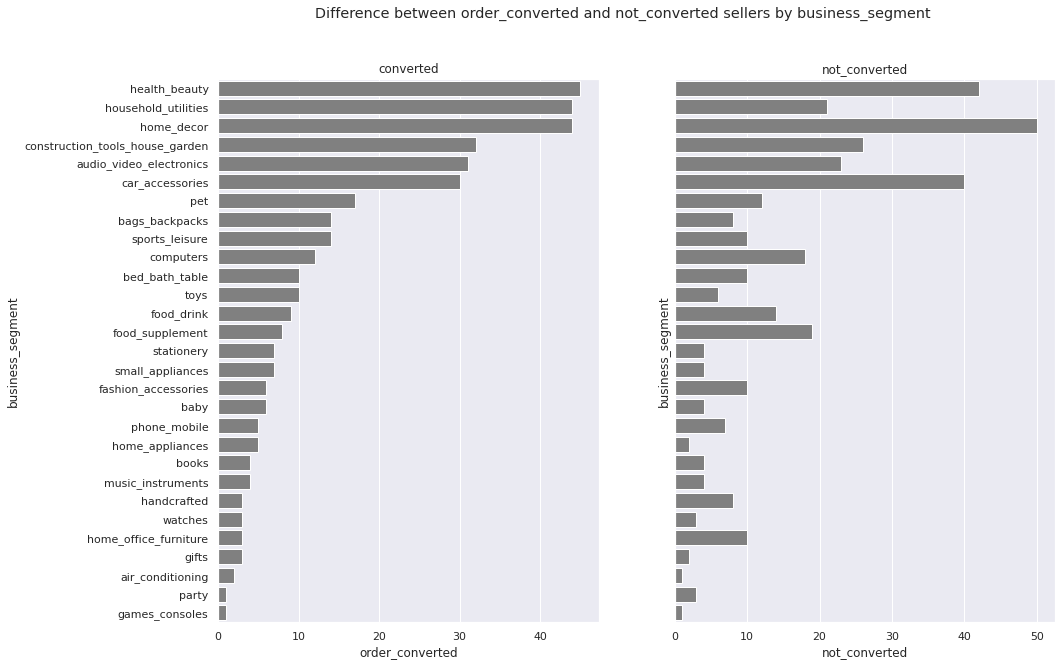

In [138]:
fig, axes = plt.subplots(1, 2, sharey= True)
fig.suptitle('Difference between order_converted and not_converted sellers by business_segment')
axes[0].set_title('converted')
axes[1].set_title('not_converted')
bs_per_order_conversion.reset_index(inplace = True)
sns.barplot(ax = axes[0], x = bs_per_order_conversion['order_converted'], y = bs_per_order_conversion['business_segment'], orient = 'h', color = 'grey', saturation = 0.5 )
sns.barplot(ax = axes[1], x = bs_per_order_conversion['not_converted'], y = bs_per_order_conversion['business_segment'], orient = 'h', color = 'grey', saturation = 0.5 )
sns.set(rc = {'figure.figsize' : (15, 10)})

#### 2️⃣ 비즈니스 타입
- 비즈니스 타입에서는 전환, 비전환 유저의 큰 차이가 없음을 확인하였음

In [139]:
# 테이블 준비
order_converted_per_bt = pd.DataFrame(order_converted.groupby('business_type')['seller_id'].count()).sort_values(by = 'seller_id', ascending = False)
order_not_converted_per_bt = pd.DataFrame(order_not_converted_80.groupby('business_type')['seller_id'].count()).sort_values(by = 'seller_id', ascending = False)


order_converted_per_bt.rename(columns = {'seller_id' : 'order_converted'}, inplace = True)
order_not_converted_per_bt.rename(columns = {'seller_id' : 'not_converted'}, inplace = True)

bt_per_order_conversion = order_converted_per_bt.merge(order_not_converted_per_bt, how = 'left', on = 'business_type')
bt_per_order_conversion['total'] = order_converted_per_bt['order_converted'] + order_not_converted_per_bt['not_converted']


# 그래프를 만들기 위한 테이블 생성 
bt_per_order_conversion_bar = bt_per_order_conversion.reset_index().melt(id_vars = 'business_type', value_vars = ['order_converted', 'not_converted'], var_name = 'status', value_name = 'number_of_seller')
bt_per_order_conversion_bar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   business_type     6 non-null      object
 1   status            6 non-null      object
 2   number_of_seller  6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [140]:
bt_per_order_conversion['order_conversion_rate(%)'] = bt_per_order_conversion['order_converted'] / bt_per_order_conversion['total'] * 100

In [141]:
bt_per_order_conversion

,order_converted,not_converted,total,order_conversion_rate(%)
business_type,,,,
reseller,287,235,522,54.980843
manufacturer,90,134,224,40.178571
other,3,7,10,30.000000


[(0.0, 100.0), Text(0.5, 1.0, 'Order conversion rate by business_type')]

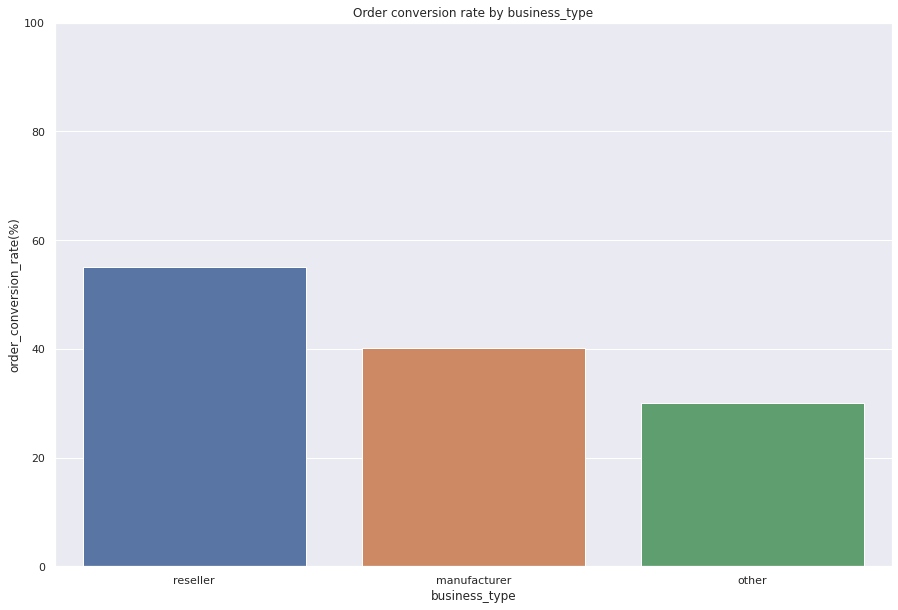

In [142]:
bt_order_cvr = sns.barplot(data = bt_per_order_conversion, x = bt_per_order_conversion.index, y = 'order_conversion_rate(%)', orient = 'v')
bt_order_cvr.set(ylim = (0, 100), title = 'Order conversion rate by business_type')

In [146]:
# fig, axes = plt.subplots(1, 2, sharey= True, sharex = True)
# fig.suptitle('Difference between order_converted and not_converted sellers by business_type')
# axes[0].set_title('converted')
# axes[1].set_title('not_converted')
# bt_per_order_conversion.reset_index(inplace = True)
# sns.barplot(ax = axes[0], x = bt_per_order_conversion['order_converted'], y = bt_per_order_conversion['order_converted'], orient = 'h', color = 'green', saturation = 0.5 )
# sns.barplot(ax = axes[1], x = bt_per_order_conversion['business_type'], y = bt_per_order_conversion['business_type'], orient = 'h', color = 'grey', saturation = 0.5 )

#### 3️⃣ 비즈니스 세그먼트와 타입 조합

In [147]:
# bs, bt 별 seller 수 출력
order_converted_per_business = pd.DataFrame(order_converted.groupby(['business_segment', 'business_type'])['seller_id'].count()).sort_values(by = 'seller_id', ascending = False)
order_converted_per_business.rename(columns = {'seller_id' : 'order_converted'}, inplace = True)

order_not_converted_per_business = pd.DataFrame(order_not_converted.groupby(['business_segment', 'business_type'])['seller_id'].count()).sort_values(by = 'seller_id', ascending = False)
order_not_converted_per_business.rename(columns = {'seller_id' : 'not_converted'}, inplace = True)

In [148]:
order_converted_per_business = pd.pivot_table(order_converted_per_business, values='order_converted', columns=['business_type'],index=['business_segment'])
order_not_converted_per_business = pd.pivot_table(order_not_converted_per_business, values='not_converted', columns=['business_type'],index=['business_segment'])

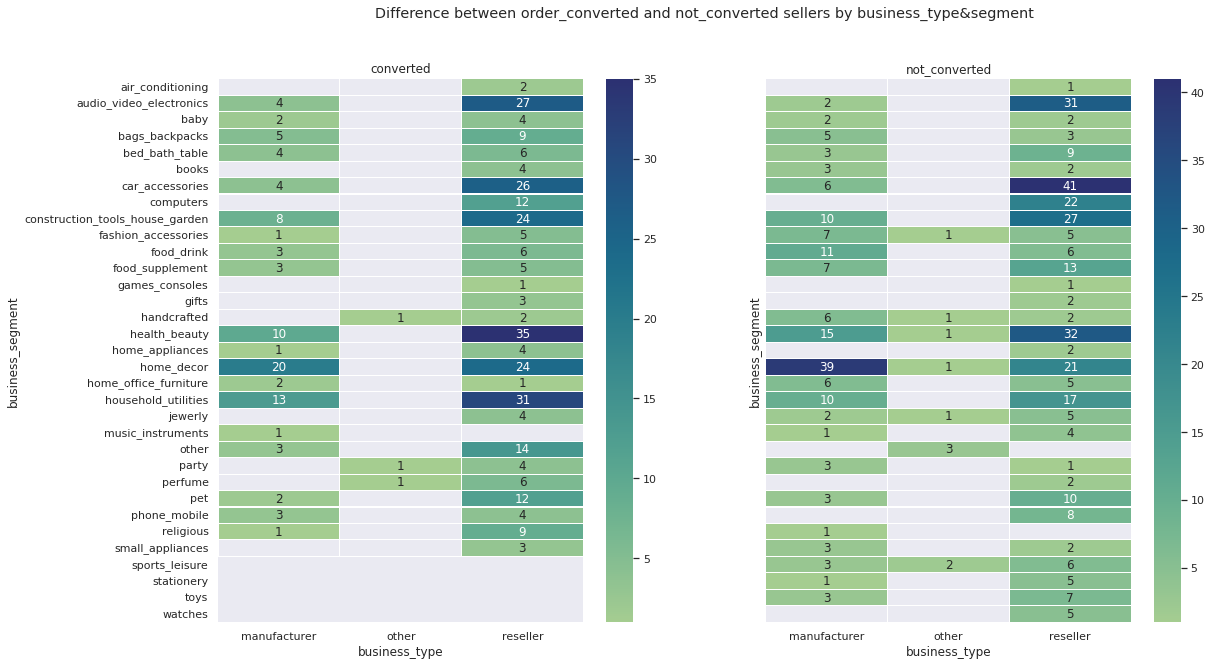

In [149]:
# heatmap으로 sdr, sr 조합 확인
fig, axes = plt.subplots(1, 2, figsize = (18, 10), sharey = True)
fig.suptitle('Difference between order_converted and not_converted sellers by business_type&segment')
axes[0].set_title('converted')
axes[1].set_title('not_converted')

sns.heatmap(order_converted_per_business, annot = True, linewidth = 0.05, cmap = "crest", ax = axes[0]) 
sns.heatmap(order_not_converted_per_business, annot = True, linewidth = 0.05, cmap = "crest", ax = axes[1])
# sns.barplot(ax = axes[1], x = bt_per_order_conversion['not_converted'], y = bt_per_order_conversion['business_type'], orient = 'h', color = 'grey', saturation = 0.5 )
